In [301]:
#importing python libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [302]:
#loading dataset into a python dataframe
df=pd.read_csv(r"C:\Users\caappiah\OneDrive - Fidelity Bank Ghana Limited\Desktop\Churn Modeling\TABLES\AccountData.csv")

In [303]:
#viewing first 20 rows of the dataframe
df.head(10)

,ACCOUNTNUMBER,ACCOUNTCATEGORY,CUSTOMERTYPE,DATEOFBIRTH,SEX,CUST_STATUS,ONBOARDING_DATE,CURRENTBALANCE,TOTAL_TRANSACTION_AMOUNT,TOTAL_NO_OF_TRANSACTIONS,DEBIT_AMOUNT,CREDIT_AMOUNT,DEBIT_TXN_COUNT,CREDIT_TXN_COUNT,PRODUCTS,CREDIT_SCORE,LAST_DEBIT_ACTIVITY_DATE,LAST_CREDIT_ACTIVITY_DATE,TXN_PERIOD
0,4110976690063690,Savings,INDIVIDUAL,1971-04-17 00:00:00.000,M,1,26-JUN-25,2316554,554086763,6,277046227,277040536,4,2,1.00,53.00,2025-10-27,2025-06-27,202510
1,4110871659832165,Current,INDIVIDUAL,1977-03-12 00:00:00.000,F,3,05-DEC-11,61798707,15466165,2,15465000,1165,1,1,3.00,75.00,2024-01-30,2024-01-26,202401
2,4861616487470365,Savings,INDIVIDUAL,2005-04-23 00:00:00.000,M,1,07-AUG-24,33922539,20539850,14,20518962,20888,13,1,3.00,42.00,2025-05-22,2025-01-16,202505
3,2146536427557865,Current,INDIVIDUAL,1965-11-27 00:00:00.000,M,1,23-NOV-10,44382189,46953473,28,12933586,34019887,26,2,3.00,93.00,2025-05-02,2025-04-29,202504
4,4253475657981190,Smart,INDIVIDUAL,2000-05-01 00:00:00.000,F,1,17-AUG-23,843440,521634,3,5155,516479,1,2,3.00,14.00,2024-01-31,2024-02-02,202402
5,4254074404922740,Smart,INDIVIDUAL,1997-11-20 00:00:00.000,M,1,06-APR-22,-922337203685477581,62169,3,31239,30930,2,1,2.00,17.00,2025-09-25,2025-09-24,202509
6,4112205865069765,Savings,INDIVIDUAL,1985-12-23 00:00:00.000,M,1,10-NOV-23,200870,2103,2,2062,41,1,1,2.00,17.00,2025-07-17,2023-11-10,202507
7,4254024952397740,Smart,INDIVIDUAL,1999-01-11 00:00:00.000,M,1,10-MAR-23,251502,48777,5,48457,320,4,1,2.00,60.00,2025-02-28,2024-11-29,202502
8,4111572001989640,Current,INDIVIDUAL,1985-02-26 00:00:00.000,M,2,01-MAR-16,97522352,6187031,3,2970301,3216730,1,2,3.00,96.00,2025-04-02,2025-03-28,202503
9,2836251017892265,Current,INDIVIDUAL,1994-06-09 00:00:00.000,M,1,20-AUG-24,22094,1098396,17,1098396,0,17,0,2.00,44.00,2025-04-22,2025-03-17,202504


In [304]:

unique_values = df["TXN_PERIOD"].unique()
print(unique_values)


[202510 202401 202505 202504 202402 202509 202507 202502 202503 202501
 202506 202508]


In [305]:
#checking the structure of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14514 entries, 0 to 14513
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ACCOUNTNUMBER              14514 non-null  int64  
 1   ACCOUNTCATEGORY            14514 non-null  object 
 2   CUSTOMERTYPE               14514 non-null  object 
 3   DATEOFBIRTH                14514 non-null  object 
 4   SEX                        14514 non-null  object 
 5   CUST_STATUS                14514 non-null  int64  
 6   ONBOARDING_DATE            14514 non-null  object 
 7   CURRENTBALANCE             14514 non-null  int64  
 8   TOTAL_TRANSACTION_AMOUNT   14514 non-null  int64  
 9   TOTAL_NO_OF_TRANSACTIONS   14514 non-null  int64  
 10  DEBIT_AMOUNT               14514 non-null  int64  
 11  CREDIT_AMOUNT              14514 non-null  int64  
 12  DEBIT_TXN_COUNT            14514 non-null  int64  
 13  CREDIT_TXN_COUNT           14514 non-null  int

In [306]:
#checking the datatype of the variables
df.dtypes

ACCOUNTNUMBER                  int64
ACCOUNTCATEGORY               object
CUSTOMERTYPE                  object
DATEOFBIRTH                   object
SEX                           object
CUST_STATUS                    int64
ONBOARDING_DATE               object
CURRENTBALANCE                 int64
TOTAL_TRANSACTION_AMOUNT       int64
TOTAL_NO_OF_TRANSACTIONS       int64
DEBIT_AMOUNT                   int64
CREDIT_AMOUNT                  int64
DEBIT_TXN_COUNT                int64
CREDIT_TXN_COUNT               int64
PRODUCTS                     float64
CREDIT_SCORE                 float64
LAST_DEBIT_ACTIVITY_DATE      object
LAST_CREDIT_ACTIVITY_DATE     object
TXN_PERIOD                     int64
dtype: object

In [307]:
#understanding the statistical info of the data
df.describe()

,ACCOUNTNUMBER,CUST_STATUS,CURRENTBALANCE,TOTAL_TRANSACTION_AMOUNT,TOTAL_NO_OF_TRANSACTIONS,DEBIT_AMOUNT,CREDIT_AMOUNT,DEBIT_TXN_COUNT,CREDIT_TXN_COUNT,PRODUCTS,CREDIT_SCORE,TXN_PERIOD
count,14514.00,14514.00,14514.00,14514.00,14514.00,14514.00,14514.00,14514.00,14514.00,14508.00,14427.00,14514.00
mean,4043537912691765.00,1.38,-46199472711079264.00,36717750.60,15.90,18600795.87,18116954.74,13.05,2.85,2.65,46.64,202490.73
std,843678622882302.75,0.76,201196148637578496.00,365423472.08,26.61,190054371.61,182348249.04,24.78,4.78,0.82,21.43,36.54
min,2085786289499440.00,0.00,-922337203685477632.00,-360097.00,1.00,-2062.00,-370407.00,0.00,0.00,1.00,4.00,202401.00
25%,4110820351153690.00,1.00,33623.75,338031.75,3.00,24805.75,16063.00,2.00,1.00,2.00,28.00,202502.00
50%,4112312060314165.00,1.00,580747.00,2689646.50,7.00,1082854.00,1051620.00,5.00,2.00,3.00,47.00,202505.00
75%,4253475621432977.50,2.00,4502737.75,10683967.25,18.00,5026973.00,4920671.50,14.00,3.00,3.00,65.00,202508.00
max,16342999166027740.00,5.00,3434989381.00,27373711902.00,593.00,13869751227.00,13522982625.00,581.00,91.00,6.00,98.00,202510.00


In [308]:
#checking for null values
df.isnull().sum()

ACCOUNTNUMBER                 0
ACCOUNTCATEGORY               0
CUSTOMERTYPE                  0
DATEOFBIRTH                   0
SEX                           0
CUST_STATUS                   0
ONBOARDING_DATE               0
CURRENTBALANCE                0
TOTAL_TRANSACTION_AMOUNT      0
TOTAL_NO_OF_TRANSACTIONS      0
DEBIT_AMOUNT                  0
CREDIT_AMOUNT                 0
DEBIT_TXN_COUNT               0
CREDIT_TXN_COUNT              0
PRODUCTS                      6
CREDIT_SCORE                 87
LAST_DEBIT_ACTIVITY_DATE      0
LAST_CREDIT_ACTIVITY_DATE     0
TXN_PERIOD                    0
dtype: int64

In [309]:
#finds the mode
credit_avg = df['CREDIT_SCORE'].mean().round()
product_avg = df['PRODUCTS'].mean().round()

#filling the missing values with the average and mode
df['CREDIT_SCORE'] = df['CREDIT_SCORE'].fillna(credit_avg)
df['PRODUCTS'] = df['PRODUCTS'].fillna(product_avg)

In [310]:
#checking if imputations worked
df.isnull().sum()

ACCOUNTNUMBER                0
ACCOUNTCATEGORY              0
CUSTOMERTYPE                 0
DATEOFBIRTH                  0
SEX                          0
CUST_STATUS                  0
ONBOARDING_DATE              0
CURRENTBALANCE               0
TOTAL_TRANSACTION_AMOUNT     0
TOTAL_NO_OF_TRANSACTIONS     0
DEBIT_AMOUNT                 0
CREDIT_AMOUNT                0
DEBIT_TXN_COUNT              0
CREDIT_TXN_COUNT             0
PRODUCTS                     0
CREDIT_SCORE                 0
LAST_DEBIT_ACTIVITY_DATE     0
LAST_CREDIT_ACTIVITY_DATE    0
TXN_PERIOD                   0
dtype: int64

In [311]:
#changing the datatype of the column to datetime datatype
df["TXN_PERIOD"] = pd.to_numeric(df["TXN_PERIOD"], errors="coerce").astype("Int64")


df["TXN_PERIOD"] = pd.to_datetime(
    df["TXN_PERIOD"].astype(str),
    format="%Y%m", #identifying the format
    errors="coerce")

In [312]:
df.head(10)

,ACCOUNTNUMBER,ACCOUNTCATEGORY,CUSTOMERTYPE,DATEOFBIRTH,SEX,CUST_STATUS,ONBOARDING_DATE,CURRENTBALANCE,TOTAL_TRANSACTION_AMOUNT,TOTAL_NO_OF_TRANSACTIONS,DEBIT_AMOUNT,CREDIT_AMOUNT,DEBIT_TXN_COUNT,CREDIT_TXN_COUNT,PRODUCTS,CREDIT_SCORE,LAST_DEBIT_ACTIVITY_DATE,LAST_CREDIT_ACTIVITY_DATE,TXN_PERIOD
0,4110976690063690,Savings,INDIVIDUAL,1971-04-17 00:00:00.000,M,1,26-JUN-25,2316554,554086763,6,277046227,277040536,4,2,1.00,53.00,2025-10-27,2025-06-27,2025-10-01
1,4110871659832165,Current,INDIVIDUAL,1977-03-12 00:00:00.000,F,3,05-DEC-11,61798707,15466165,2,15465000,1165,1,1,3.00,75.00,2024-01-30,2024-01-26,2024-01-01
2,4861616487470365,Savings,INDIVIDUAL,2005-04-23 00:00:00.000,M,1,07-AUG-24,33922539,20539850,14,20518962,20888,13,1,3.00,42.00,2025-05-22,2025-01-16,2025-05-01
3,2146536427557865,Current,INDIVIDUAL,1965-11-27 00:00:00.000,M,1,23-NOV-10,44382189,46953473,28,12933586,34019887,26,2,3.00,93.00,2025-05-02,2025-04-29,2025-04-01
4,4253475657981190,Smart,INDIVIDUAL,2000-05-01 00:00:00.000,F,1,17-AUG-23,843440,521634,3,5155,516479,1,2,3.00,14.00,2024-01-31,2024-02-02,2024-02-01
5,4254074404922740,Smart,INDIVIDUAL,1997-11-20 00:00:00.000,M,1,06-APR-22,-922337203685477581,62169,3,31239,30930,2,1,2.00,17.00,2025-09-25,2025-09-24,2025-09-01
6,4112205865069765,Savings,INDIVIDUAL,1985-12-23 00:00:00.000,M,1,10-NOV-23,200870,2103,2,2062,41,1,1,2.00,17.00,2025-07-17,2023-11-10,2025-07-01
7,4254024952397740,Smart,INDIVIDUAL,1999-01-11 00:00:00.000,M,1,10-MAR-23,251502,48777,5,48457,320,4,1,2.00,60.00,2025-02-28,2024-11-29,2025-02-01
8,4111572001989640,Current,INDIVIDUAL,1985-02-26 00:00:00.000,M,2,01-MAR-16,97522352,6187031,3,2970301,3216730,1,2,3.00,96.00,2025-04-02,2025-03-28,2025-03-01
9,2836251017892265,Current,INDIVIDUAL,1994-06-09 00:00:00.000,M,1,20-AUG-24,22094,1098396,17,1098396,0,17,0,2.00,44.00,2025-04-22,2025-03-17,2025-04-01


In [313]:
df.columns

Index(['ACCOUNTNUMBER', 'ACCOUNTCATEGORY', 'CUSTOMERTYPE', 'DATEOFBIRTH',
       'SEX', 'CUST_STATUS', 'ONBOARDING_DATE', 'CURRENTBALANCE',
       'TOTAL_TRANSACTION_AMOUNT', 'TOTAL_NO_OF_TRANSACTIONS', 'DEBIT_AMOUNT',
       'CREDIT_AMOUNT', 'DEBIT_TXN_COUNT', 'CREDIT_TXN_COUNT', 'PRODUCTS',
       'CREDIT_SCORE', 'LAST_DEBIT_ACTIVITY_DATE', 'LAST_CREDIT_ACTIVITY_DATE',
       'TXN_PERIOD'],
      dtype='object')

In [314]:

#Converting the date columns datatype to datetime
df['DATEOFBIRTH'] = pd.to_datetime(df['DATEOFBIRTH'], errors='coerce')

df['ONBOARDING_DATE'] = pd.to_datetime(df['ONBOARDING_DATE'], errors='coerce')

df['LAST_DEBIT_ACTIVITY_DATE'] = pd.to_datetime(df['LAST_DEBIT_ACTIVITY_DATE'], errors='coerce')

df['LAST_CREDIT_ACTIVITY_DATE'] = pd.to_datetime(df['LAST_CREDIT_ACTIVITY_DATE'], errors='coerce')


df.dtypes #checks to see if the data type has changed to datetime

ACCOUNTNUMBER                         int64
ACCOUNTCATEGORY                      object
CUSTOMERTYPE                         object
DATEOFBIRTH                  datetime64[ns]
SEX                                  object
CUST_STATUS                           int64
ONBOARDING_DATE              datetime64[ns]
CURRENTBALANCE                        int64
TOTAL_TRANSACTION_AMOUNT              int64
TOTAL_NO_OF_TRANSACTIONS              int64
DEBIT_AMOUNT                          int64
CREDIT_AMOUNT                         int64
DEBIT_TXN_COUNT                       int64
CREDIT_TXN_COUNT                      int64
PRODUCTS                            float64
CREDIT_SCORE                        float64
LAST_DEBIT_ACTIVITY_DATE     datetime64[ns]
LAST_CREDIT_ACTIVITY_DATE    datetime64[ns]
TXN_PERIOD                   datetime64[ns]
dtype: object

In [315]:
#calculating the age of customers based on their date of birth

from datetime import date 
def calculate_age(born): #defining function name
    today = date.today() #gets todays date
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day)) 
# calculates the difference and if a cust haven't had a birthday yet,substract 1
df['AGE'] = df['DATEOFBIRTH'].apply(calculate_age)

In [316]:
#checking if there are any null or missing values
df.isnull().sum()

ACCOUNTNUMBER                0
ACCOUNTCATEGORY              0
CUSTOMERTYPE                 0
DATEOFBIRTH                  0
SEX                          0
CUST_STATUS                  0
ONBOARDING_DATE              0
CURRENTBALANCE               0
TOTAL_TRANSACTION_AMOUNT     0
TOTAL_NO_OF_TRANSACTIONS     0
DEBIT_AMOUNT                 0
CREDIT_AMOUNT                0
DEBIT_TXN_COUNT              0
CREDIT_TXN_COUNT             0
PRODUCTS                     0
CREDIT_SCORE                 0
LAST_DEBIT_ACTIVITY_DATE     0
LAST_CREDIT_ACTIVITY_DATE    0
TXN_PERIOD                   0
AGE                          0
dtype: int64

In [317]:
#Caculating the tenure in months
today = date.today()

tenure_months = (
    (today.year - df['ONBOARDING_DATE'].dt.year) * 12
    + (today.month - df['ONBOARDING_DATE'].dt.month)
    - (today.day < df['ONBOARDING_DATE'].dt.day).astype('Int64')  
    )# subtract 1 if not reached day yet

df['TENURE'] = tenure_months

In [318]:
#viewing the first 5 rows of the dataframe
df.head(5)

,ACCOUNTNUMBER,ACCOUNTCATEGORY,CUSTOMERTYPE,DATEOFBIRTH,SEX,CUST_STATUS,ONBOARDING_DATE,CURRENTBALANCE,TOTAL_TRANSACTION_AMOUNT,TOTAL_NO_OF_TRANSACTIONS,...,CREDIT_AMOUNT,DEBIT_TXN_COUNT,CREDIT_TXN_COUNT,PRODUCTS,CREDIT_SCORE,LAST_DEBIT_ACTIVITY_DATE,LAST_CREDIT_ACTIVITY_DATE,TXN_PERIOD,AGE,TENURE
0,4110976690063690,Savings,INDIVIDUAL,1971-04-17,M,1,2025-06-26,2316554,554086763,6,...,277040536,4,2,1.00,53.00,2025-10-27,2025-06-27,2025-10-01,54,7
1,4110871659832165,Current,INDIVIDUAL,1977-03-12,F,3,2011-12-05,61798707,15466165,2,...,1165,1,1,3.00,75.00,2024-01-30,2024-01-26,2024-01-01,48,169
2,4861616487470365,Savings,INDIVIDUAL,2005-04-23,M,1,2024-08-07,33922539,20539850,14,...,20888,13,1,3.00,42.00,2025-05-22,2025-01-16,2025-05-01,20,17
3,2146536427557865,Current,INDIVIDUAL,1965-11-27,M,1,2010-11-23,44382189,46953473,28,...,34019887,26,2,3.00,93.00,2025-05-02,2025-04-29,2025-04-01,60,182
4,4253475657981190,Smart,INDIVIDUAL,2000-05-01,F,1,2023-08-17,843440,521634,3,...,516479,1,2,3.00,14.00,2024-01-31,2024-02-02,2024-02-01,25,29


In [319]:
#viewing the varibales in the dataframe
df.columns

Index(['ACCOUNTNUMBER', 'ACCOUNTCATEGORY', 'CUSTOMERTYPE', 'DATEOFBIRTH',
       'SEX', 'CUST_STATUS', 'ONBOARDING_DATE', 'CURRENTBALANCE',
       'TOTAL_TRANSACTION_AMOUNT', 'TOTAL_NO_OF_TRANSACTIONS', 'DEBIT_AMOUNT',
       'CREDIT_AMOUNT', 'DEBIT_TXN_COUNT', 'CREDIT_TXN_COUNT', 'PRODUCTS',
       'CREDIT_SCORE', 'LAST_DEBIT_ACTIVITY_DATE', 'LAST_CREDIT_ACTIVITY_DATE',
       'TXN_PERIOD', 'AGE', 'TENURE'],
      dtype='object')

In [320]:
#selecting the lastes activity date from the debit and credit activity dates
df['LAST_ACTIVITY_DATE'] = df[['LAST_DEBIT_ACTIVITY_DATE','LAST_CREDIT_ACTIVITY_DATE']].max(axis=1)

In [321]:
#selecting the varibales needed and ensuring that the account number or customer has the same last activity date accross all

#defining a function to find mode
def stable_mode(series: pd.Series):
    s = series.dropna()
    if s.empty:
        return np.nan
    counts = s.value_counts()
    top_count = counts.max()
    candidates = counts[counts == top_count].index
    return sorted(candidates, key=lambda x: str(x))[0]

#ensuring the datatype for last activity date in datetime
df['LAST_ACTIVITY_DATE'] = pd.to_datetime(df['LAST_ACTIVITY_DATE'], errors='coerce')

#assigning the last activity date to all account
df['LAST_ACTIVITY_DATE_OVERALL'] = (
    df.groupby('ACCOUNTNUMBER')['LAST_ACTIVITY_DATE']
      .transform('max')
)

#aggregating and selecting the final variables for the dataframe
customers = (
    df.groupby(['ACCOUNTNUMBER', 'TXN_PERIOD'], as_index=False)
      .agg({
          'ACCOUNTCATEGORY':           stable_mode,
          'CUSTOMERTYPE':              stable_mode,
          'SEX':                       stable_mode,
          'ONBOARDING_DATE':           'min',
          'CURRENTBALANCE':            'sum',
          'TOTAL_TRANSACTION_AMOUNT':  'mean',
          'TOTAL_NO_OF_TRANSACTIONS':  'mean',
          'DEBIT_AMOUNT':              'mean',
          'CREDIT_AMOUNT':             'mean',
          'DEBIT_TXN_COUNT':           'mean',
          'CREDIT_TXN_COUNT':          'mean',
          'PRODUCTS':                  'mean',
          'CREDIT_SCORE':              'mean',
          'AGE':                       stable_mode,
          'TENURE':                    'mean',
          'LAST_ACTIVITY_DATE_OVERALL':'first',  
      })
      .rename(columns={'LAST_ACTIVITY_DATE_OVERALL':'LAST_ACTIVITY_DATE'}))

In [322]:
#viewing the first 10 rows in the dataframe
customers.head(10)

,ACCOUNTNUMBER,TXN_PERIOD,ACCOUNTCATEGORY,CUSTOMERTYPE,SEX,ONBOARDING_DATE,CURRENTBALANCE,TOTAL_TRANSACTION_AMOUNT,TOTAL_NO_OF_TRANSACTIONS,DEBIT_AMOUNT,CREDIT_AMOUNT,DEBIT_TXN_COUNT,CREDIT_TXN_COUNT,PRODUCTS,CREDIT_SCORE,AGE,TENURE,LAST_ACTIVITY_DATE
0,2085786289499440,2024-02-01,Current,INDIVIDUAL,M,2010-11-22,19898,20620.00,1.00,20620.00,0.00,1.00,0.00,1.00,23.00,61,182.00,2024-02-05
1,2085815657612740,2024-01-01,Current,INDIVIDUAL,M,2017-07-27,8483099,88409591.00,96.00,44076591.00,44333000.00,85.00,11.00,3.00,60.00,62,102.00,2025-10-31
2,2085815657612740,2024-02-01,Current,INDIVIDUAL,M,2017-07-27,109954129,354649236.00,111.00,122975411.00,231673825.00,108.00,3.00,3.00,60.00,62,102.00,2025-10-31
3,2085815657612740,2025-01-01,Current,INDIVIDUAL,M,2017-07-27,101879729,172082499.00,110.00,95176363.00,76906136.00,104.00,6.00,3.00,60.00,62,102.00,2025-10-31
4,2085815657612740,2025-02-01,Current,INDIVIDUAL,M,2017-07-27,96159473,481739432.00,157.00,243287855.00,238451577.00,147.00,10.00,3.00,60.00,62,102.00,2025-10-31
5,2085815657612740,2025-03-01,Current,INDIVIDUAL,M,2017-07-27,84707558,384779366.00,160.00,192746626.00,192032740.00,152.00,8.00,3.00,60.00,62,102.00,2025-10-31
6,2085815657612740,2025-04-01,Current,INDIVIDUAL,M,2017-07-27,66322261,294689793.00,165.00,148332414.00,146357379.00,153.00,12.00,3.00,60.00,62,102.00,2025-10-31
7,2085815657612740,2025-05-01,Current,INDIVIDUAL,M,2017-07-27,67890741,328826914.00,128.00,163909473.00,164917441.00,119.00,9.00,3.00,60.00,62,102.00,2025-10-31
8,2085815657612740,2025-06-01,Current,INDIVIDUAL,M,2017-07-27,80062233,167012639.00,90.00,74986898.00,92025741.00,85.00,5.00,3.00,60.00,62,102.00,2025-10-31
9,2085815657612740,2025-07-01,Current,INDIVIDUAL,M,2017-07-27,120493712,320354311.00,91.00,139662054.00,180692257.00,85.00,6.00,3.00,60.00,62,102.00,2025-10-31


In [323]:
#exporting the dataframe into excel dataset
customers.to_excel('customersaccount.xlsx', sheet_name= 'pivot')

In [324]:
#reassigning the customers dataframe to df
df=customers

In [325]:
#calculating the last time(months) the customer was active based on the last activity dates

from datetime import date


df['LAST_ACTIVITY_DATE'] = pd.to_datetime(df['LAST_ACTIVITY_DATE'], errors='coerce')
if getattr(df['LAST_ACTIVITY_DATE'].dt, 'tz', None) is not None:
    df['LAST_ACTIVITY_DATE'] = df['LAST_ACTIVITY_DATE'].dt.tz_localize(None)


today = date.today()


months_diff = (
    (today.year - df['LAST_ACTIVITY_DATE'].dt.year) * 12
    + (today.month - df['LAST_ACTIVITY_DATE'].dt.month)
)


day_adjust = (today.day < df['LAST_ACTIVITY_DATE'].dt.day).astype('Int64')


df['MONTHS_SINCE_ACTIVE'] = (months_diff - day_adjust)
df.loc[df['LAST_ACTIVITY_DATE'].isna(), 'MONTHS_SINCE_ACTIVE'] = pd.NA
df['MONTHS_SINCE_ACTIVE'] = df['MONTHS_SINCE_ACTIVE'].astype('Int64').clip(lower=0)


In [326]:
#defining churn status

df['CHURNED_STATUS'] = np.where(df['MONTHS_SINCE_ACTIVE']<6,0,1)

In [327]:
df.head()

,ACCOUNTNUMBER,TXN_PERIOD,ACCOUNTCATEGORY,CUSTOMERTYPE,SEX,ONBOARDING_DATE,CURRENTBALANCE,TOTAL_TRANSACTION_AMOUNT,TOTAL_NO_OF_TRANSACTIONS,DEBIT_AMOUNT,CREDIT_AMOUNT,DEBIT_TXN_COUNT,CREDIT_TXN_COUNT,PRODUCTS,CREDIT_SCORE,AGE,TENURE,LAST_ACTIVITY_DATE,MONTHS_SINCE_ACTIVE,CHURNED_STATUS
0,2085786289499440,2024-02-01,Current,INDIVIDUAL,M,2010-11-22,19898,20620.00,1.00,20620.00,0.00,1.00,0.00,1.00,23.00,61,182.00,2024-02-05,23,1
1,2085815657612740,2024-01-01,Current,INDIVIDUAL,M,2017-07-27,8483099,88409591.00,96.00,44076591.00,44333000.00,85.00,11.00,3.00,60.00,62,102.00,2025-10-31,3,0
2,2085815657612740,2024-02-01,Current,INDIVIDUAL,M,2017-07-27,109954129,354649236.00,111.00,122975411.00,231673825.00,108.00,3.00,3.00,60.00,62,102.00,2025-10-31,3,0
3,2085815657612740,2025-01-01,Current,INDIVIDUAL,M,2017-07-27,101879729,172082499.00,110.00,95176363.00,76906136.00,104.00,6.00,3.00,60.00,62,102.00,2025-10-31,3,0
4,2085815657612740,2025-02-01,Current,INDIVIDUAL,M,2017-07-27,96159473,481739432.00,157.00,243287855.00,238451577.00,147.00,10.00,3.00,60.00,62,102.00,2025-10-31,3,0


In [328]:
#checking the first 5 rows of the dataframe
df.head(5)

,ACCOUNTNUMBER,TXN_PERIOD,ACCOUNTCATEGORY,CUSTOMERTYPE,SEX,ONBOARDING_DATE,CURRENTBALANCE,TOTAL_TRANSACTION_AMOUNT,TOTAL_NO_OF_TRANSACTIONS,DEBIT_AMOUNT,CREDIT_AMOUNT,DEBIT_TXN_COUNT,CREDIT_TXN_COUNT,PRODUCTS,CREDIT_SCORE,AGE,TENURE,LAST_ACTIVITY_DATE,MONTHS_SINCE_ACTIVE,CHURNED_STATUS
0,2085786289499440,2024-02-01,Current,INDIVIDUAL,M,2010-11-22,19898,20620.00,1.00,20620.00,0.00,1.00,0.00,1.00,23.00,61,182.00,2024-02-05,23,1
1,2085815657612740,2024-01-01,Current,INDIVIDUAL,M,2017-07-27,8483099,88409591.00,96.00,44076591.00,44333000.00,85.00,11.00,3.00,60.00,62,102.00,2025-10-31,3,0
2,2085815657612740,2024-02-01,Current,INDIVIDUAL,M,2017-07-27,109954129,354649236.00,111.00,122975411.00,231673825.00,108.00,3.00,3.00,60.00,62,102.00,2025-10-31,3,0
3,2085815657612740,2025-01-01,Current,INDIVIDUAL,M,2017-07-27,101879729,172082499.00,110.00,95176363.00,76906136.00,104.00,6.00,3.00,60.00,62,102.00,2025-10-31,3,0
4,2085815657612740,2025-02-01,Current,INDIVIDUAL,M,2017-07-27,96159473,481739432.00,157.00,243287855.00,238451577.00,147.00,10.00,3.00,60.00,62,102.00,2025-10-31,3,0


In [329]:
#pivot table to help understand customers total transaction behaviour
customer_pivot = (
    df.pivot_table(
        index=['ACCOUNTNUMBER','CHURNED_STATUS','LAST_ACTIVITY_DATE'],
        columns='TXN_PERIOD',              
        values=['TOTAL_TRANSACTION_AMOUNT'],
        aggfunc='sum',
        fill_value=0
    )
    .sort_index(axis=1)                     
    .reset_index()
)
customer_pivot.head(10)

ACCOUNTNUMBER CHURNED_STATUS LAST_ACTIVITY_DATE  \
TXN_PERIOD               NaT            NaT                NaT   
0           2085786289499440              1         2024-02-05   
1           2085815657612740              0         2025-10-31   
2           2085817658511190              0         2025-10-28   
3           2096425570600840              0         2025-10-24   
4           2096576728947265              1         2025-07-07   
5           2096750807861665              0         2025-10-20   
6           2096778693940240              0         2025-10-31   
7           2097612505710715              1         2025-05-26   
8           2097693626410840              0         2025-10-28   
9           2097730682687740              0         2025-11-03   

           TOTAL_TRANSACTION_AMOUNT                                         \
TXN_PERIOD               2024-01-01   2024-02-01   2025-01-01   2025-02-01   
0                              0.00     20620.00         0.00         0.00   
1                       88409591.00 354649236.00 172082499.00 481739432.00   
2                        9716092.00  10789343.00  69035286.00 160594828.00   
3                       13275147.00   9294558.00  10994512.00   9124999.00   
4                       40438624.00  35696272.00  46807750.00  42714279.00   
5                              0.00         0.00     51550.00         0.00   
6                      214661809.00  86762816.00         0.00 524002657.00   
7                              0.00         0.00         0.00   7046297.00   
8                              0.00   6895988.00   5828604.00   5826027.00   
9                       45388857.00  15462938.00  46652729.00  24194230.00   

                                                                             \
TXN_PERIOD   2025-03-01   2025-04-01   2025-05-01   2025-06-01   2025-07-01   
0                  0.00         0.00         0.00         0.00         0.00   
1          384779366.00 294689793.00 328826914.00 167012639.00 320354311.00   
2          260624119.00 114769415.00  34566471.00  34106150.00  55969536.00   
3           32273733.00  13831700.00  10923043.00  10596844.00  11157833.00   
4           70754416.00  52300547.00  34202610.00  86624269.00  15466010.00   
5                  0.00         0.00   7600367.00 190673181.00  17380547.00   
6          524310205.00  29281235.00   8608633.00         0.00         0.00   
7                  0.00    490488.00   7688538.00         0.00         0.00   
8            5782725.00  10068158.00   8719033.00   6644084.00   6656353.00   
9           67467526.00  14523697.00  45950526.00  48338889.00  35024627.00   

                                                    
TXN_PERIOD   2025-08-01   2025-09-01    2025-10-01  
0                  0.00         0.00          0.00  
1          130552560.00  90918508.00  218386585.00  
2           56322447.00  51090061.00   51131156.00  
3           10873277.00  37606519.00   10902835.00  
4                  0.00         0.00          0.00  
5           11391612.00  11604039.00   10842501.00  
6          487491339.00 715010975.00 1815166424.00  
7                  0.00         0.00          0.00  
8            6687098.00   6620196.00    6535282.00  
9           17399672.00  36648514.00   66451631.00

From the pivot table, it could be noticed that, customers who are likely to churn and leave the account dormant tends to make huge amount of transactions aboube 6 minths before they stop using the account. This transactions are mostly debits. The debit transactions increases significantly but mostly depedns of the amount of money they have in the account.

Also, their transaction frequency increases. The gap between their transactions are mostly less than usual. For example, if a customer who isnt about to churn transact twice a week, a customer who s about to leave the account dormant will transact more than that and are mostly debit transactions and all of a sudden their activities drastically decreases leading to churn.

To cater for this and ensure mks of these accounts remains active, there should be marketing startegies and campaings to cater for this. In today's fast moving computarised environments, it would be essential if 

In [330]:
#exporting to excel
customer_pivot.to_excel('Total_pivot.xlsx', sheet_name='pivot')

In [331]:
#loading dataset(customer_pivot) into dataframe
df1 = pd.read_excel(r"C:\Users\caappiah\OneDrive - Fidelity Bank Ghana Limited\customerpiv5 2.xlsx")

In [332]:
#viewing the first row of the datframe
df1.head(1)

,Unnamed: 0,ACCOUNTNUMBER,CHURNED_STATUS,LAST_ACTIVITY_DATE,2024-01-01 00:00:00,2024-02-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00,2025-04-01 00:00:00,2025-05-01 00:00:00,2025-06-01 00:00:00,2025-07-01 00:00:00,2025-08-01 00:00:00,2025-09-01 00:00:00,2025-10-01 00:00:00,No Activity MONTHS,INACTIVITY_MONTHS
0,0,2085786289499440,1,2024-02-05,0,20620,0,0,0,0,0,0,0,0,0,0,2024-01,1


In [333]:
#pivoting to understand their debit transaction period
customer_pivot_debit = (
    df.pivot_table(
        index=['ACCOUNTNUMBER','CHURNED_STATUS','LAST_ACTIVITY_DATE'],
        columns='TXN_PERIOD',              
        values=['DEBIT_AMOUNT'],
        aggfunc='sum',
        fill_value=0
    )
    .sort_index(axis=1)                     
    .reset_index()
)
customer_pivot_debit.head(10)

ACCOUNTNUMBER CHURNED_STATUS LAST_ACTIVITY_DATE DEBIT_AMOUNT  \
TXN_PERIOD               NaT            NaT                NaT   2024-01-01   
0           2085786289499440              1         2024-02-05         0.00   
1           2085815657612740              0         2025-10-31  44076591.00   
2           2085817658511190              0         2025-10-28   1030948.00   
3           2096425570600840              0         2025-10-24   7778061.00   
4           2096576728947265              1         2025-07-07  20202991.00   
5           2096750807861665              0         2025-10-20         0.00   
6           2096778693940240              0         2025-10-31 107438840.00   
7           2097612505710715              1         2025-05-26         0.00   
8           2097693626410840              0         2025-10-28         0.00   
9           2097730682687740              0         2025-11-03  29430926.00   

                                                                            \
TXN_PERIOD   2024-02-01  2025-01-01   2025-02-01   2025-03-01   2025-04-01   
0              20620.00        0.00         0.00         0.00         0.00   
1          122975411.00 95176363.00 243287855.00 192746626.00 148332414.00   
2            1021206.00 46353286.00  77058538.00 131377959.00  57021507.00   
3            4622272.00  5521180.00   4167167.00  16515506.00   6917855.00   
4           17090918.00 23397586.00  20048383.00  34650951.00  28177302.00   
5                  0.00        0.00         0.00         0.00         0.00   
6           43448444.00        0.00   4172457.00 519980005.00  14630725.00   
7                  0.00        0.00   3427487.00         0.00    284288.00   
8            3450757.00  2914637.00   2912060.00   2885254.00   5028187.00   
9           15462938.00 30292842.00  17073360.00  28705102.00  14523697.00   

                                                                            \
TXN_PERIOD   2025-05-01  2025-06-01   2025-07-01   2025-08-01   2025-09-01   
0                  0.00        0.00         0.00         0.00         0.00   
1          163909473.00 74986898.00 139662054.00  85880650.00  48380768.00   
2           20103706.00 18641150.00  17661597.00  33626065.00  25315061.00   
3            5476208.00  5150009.00   5710998.00   5426442.00  18808234.00   
4           14846575.00 37793346.00  15466010.00         0.00         0.00   
5              59798.00 94679720.00  12049349.00   6060414.00   6272841.00   
6            4278433.00        0.00         0.00 168989664.00 428898165.00   
7            3811978.00        0.00         0.00         0.00         0.00   
8            4358037.00  3324975.00   3337347.00   3377000.00   3310098.00   
9           22686124.00 16869738.00  15655735.00  17399672.00  18535318.00   

                         
TXN_PERIOD   2025-10-01  
0                  0.00  
1          110380344.00  
2           30303729.00  
3            5456000.00  
4                  0.00  
5            5519036.00  
6          910852095.00  
7                  0.00  
8            3267641.00  
9           18259010.00

In [334]:
#exporting to excel
customer_pivot_debit.to_excel('Debit_pivot.xlsx', sheet_name='pivot')

In [335]:
#pivoting to understand their credit transaction period
customer_pivot_credit = (
    df.pivot_table(
        index=['ACCOUNTNUMBER','CHURNED_STATUS','LAST_ACTIVITY_DATE'],
        columns='TXN_PERIOD',              
        values=['CREDIT_AMOUNT'],
        aggfunc='sum',
        fill_value=0
    )
    .sort_index(axis=1)                     
    .reset_index()
)
customer_pivot_credit.head(10)

ACCOUNTNUMBER CHURNED_STATUS LAST_ACTIVITY_DATE CREDIT_AMOUNT  \
TXN_PERIOD               NaT            NaT                NaT    2024-01-01   
0           2085786289499440              1         2024-02-05          0.00   
1           2085815657612740              0         2025-10-31   44333000.00   
2           2085817658511190              0         2025-10-28    8685144.00   
3           2096425570600840              0         2025-10-24    5497086.00   
4           2096576728947265              1         2025-07-07   20235633.00   
5           2096750807861665              0         2025-10-20          0.00   
6           2096778693940240              0         2025-10-31  107222969.00   
7           2097612505710715              1         2025-05-26          0.00   
8           2097693626410840              0         2025-10-28          0.00   
9           2097730682687740              0         2025-11-03   15957931.00   

                                                                            \
TXN_PERIOD   2024-02-01  2025-01-01   2025-02-01   2025-03-01   2025-04-01   
0                  0.00        0.00         0.00         0.00         0.00   
1          231673825.00 76906136.00 238451577.00 192032740.00 146357379.00   
2            9768137.00 22682000.00  83536290.00 129246160.00  57747908.00   
3            4672286.00  5473332.00   4957832.00  15758227.00   6913845.00   
4           18605354.00 23410164.00  22665896.00  36103465.00  24123245.00   
5                  0.00    51550.00         0.00         0.00         0.00   
6           43314372.00        0.00 519830200.00   4330200.00  14650510.00   
7                  0.00        0.00   3618810.00         0.00    206200.00   
8            3445231.00  2913967.00   2913967.00   2897471.00   5039971.00   
9                  0.00 16359887.00   7120870.00  38762424.00         0.00   

                                                                            \
TXN_PERIOD   2025-05-01  2025-06-01   2025-07-01   2025-08-01   2025-09-01   
0                  0.00        0.00         0.00         0.00         0.00   
1          164917441.00 92025741.00 180692257.00  44671910.00  42537740.00   
2           14462765.00 15465000.00  38307939.00  22696382.00  25775000.00   
3            5446835.00  5446835.00   5446835.00   5446835.00  18798285.00   
4           19356035.00 48830923.00         0.00         0.00         0.00   
5            7540569.00 95993461.00   5331198.00   5331198.00   5331198.00   
6            4330200.00        0.00         0.00 318501675.00 286112810.00   
7            3876560.00        0.00         0.00         0.00         0.00   
8            4360996.00  3319109.00   3319006.00   3310098.00   3310098.00   
9           23264402.00 31469151.00  19368892.00         0.00  18113196.00   

                         
TXN_PERIOD   2025-10-01  
0                  0.00  
1          108006241.00  
2           20827427.00  
3            5446835.00  
4                  0.00  
5            5323465.00  
6          904314329.00  
7                  0.00  
8            3267641.00  
9           48192621.00

In [336]:
#exporting to excel
customer_pivot_credit.to_excel('Credit_pivot.xlsx', sheet_name='pivot')

In [337]:
df.head(10)

,ACCOUNTNUMBER,TXN_PERIOD,ACCOUNTCATEGORY,CUSTOMERTYPE,SEX,ONBOARDING_DATE,CURRENTBALANCE,TOTAL_TRANSACTION_AMOUNT,TOTAL_NO_OF_TRANSACTIONS,DEBIT_AMOUNT,CREDIT_AMOUNT,DEBIT_TXN_COUNT,CREDIT_TXN_COUNT,PRODUCTS,CREDIT_SCORE,AGE,TENURE,LAST_ACTIVITY_DATE,MONTHS_SINCE_ACTIVE,CHURNED_STATUS
0,2085786289499440,2024-02-01,Current,INDIVIDUAL,M,2010-11-22,19898,20620.00,1.00,20620.00,0.00,1.00,0.00,1.00,23.00,61,182.00,2024-02-05,23,1
1,2085815657612740,2024-01-01,Current,INDIVIDUAL,M,2017-07-27,8483099,88409591.00,96.00,44076591.00,44333000.00,85.00,11.00,3.00,60.00,62,102.00,2025-10-31,3,0
2,2085815657612740,2024-02-01,Current,INDIVIDUAL,M,2017-07-27,109954129,354649236.00,111.00,122975411.00,231673825.00,108.00,3.00,3.00,60.00,62,102.00,2025-10-31,3,0
3,2085815657612740,2025-01-01,Current,INDIVIDUAL,M,2017-07-27,101879729,172082499.00,110.00,95176363.00,76906136.00,104.00,6.00,3.00,60.00,62,102.00,2025-10-31,3,0
4,2085815657612740,2025-02-01,Current,INDIVIDUAL,M,2017-07-27,96159473,481739432.00,157.00,243287855.00,238451577.00,147.00,10.00,3.00,60.00,62,102.00,2025-10-31,3,0
5,2085815657612740,2025-03-01,Current,INDIVIDUAL,M,2017-07-27,84707558,384779366.00,160.00,192746626.00,192032740.00,152.00,8.00,3.00,60.00,62,102.00,2025-10-31,3,0
6,2085815657612740,2025-04-01,Current,INDIVIDUAL,M,2017-07-27,66322261,294689793.00,165.00,148332414.00,146357379.00,153.00,12.00,3.00,60.00,62,102.00,2025-10-31,3,0
7,2085815657612740,2025-05-01,Current,INDIVIDUAL,M,2017-07-27,67890741,328826914.00,128.00,163909473.00,164917441.00,119.00,9.00,3.00,60.00,62,102.00,2025-10-31,3,0
8,2085815657612740,2025-06-01,Current,INDIVIDUAL,M,2017-07-27,80062233,167012639.00,90.00,74986898.00,92025741.00,85.00,5.00,3.00,60.00,62,102.00,2025-10-31,3,0
9,2085815657612740,2025-07-01,Current,INDIVIDUAL,M,2017-07-27,120493712,320354311.00,91.00,139662054.00,180692257.00,85.00,6.00,3.00,60.00,62,102.00,2025-10-31,3,0


In [ ]:
#aggregating the first 6 transactions and the last 6 transactions

df = df.sort_values(['ACCOUNTNUMBER', 'TXN_PERIOD'])

df['period_rank'] = df.groupby('ACCOUNTNUMBER')['TXN_PERIOD'].rank(method='first').astype(int)

df['period_count'] = df.groupby('ACCOUNTNUMBER')['TXN_PERIOD'].transform('count')


first_n = 6
last_n  = 6

is_prev = df['period_rank'] <= first_n
is_curr = (df['period_count'] - df['period_rank'] + 1) <= last_n  

df['PREV_TRANS_AMOUNT'] = (
    df.where(is_prev)
      .groupby('ACCOUNTNUMBER')['TOTAL_TRANSACTION_AMOUNT']
      .transform('sum')
)

df['CURR_TRANS_AMOUNT'] = (
    df.where(is_curr)
      .groupby('ACCOUNTNUMBER')['TOTAL_TRANSACTION_AMOUNT']
      .transform('sum')
)


In [ ]:
#checking the first 5 rows of the dataframe
df.head(5)

,ACCOUNTNUMBER,TXN_PERIOD,ACCOUNTCATEGORY,CUSTOMERTYPE,SEX,ONBOARDING_DATE,CURRENTBALANCE,TOTAL_TRANSACTION_AMOUNT,TOTAL_NO_OF_TRANSACTIONS,DEBIT_AMOUNT,...,CREDIT_SCORE,AGE,TENURE,LAST_ACTIVITY_DATE,MONTHS_SINCE_ACTIVE,CHURNED_STATUS,period_rank,period_count,PREV_TRANS_AMOUNT,CURR_TRANS_AMOUNT
0,2085786289499440,2024-02-01,Current,INDIVIDUAL,M,2010-11-22,19898,20620.00,1.00,20620.00,...,23.00,61,182.00,2024-02-05,23,1,1,1,20620.00,20620.00
1,2085815657612740,2024-01-01,Current,INDIVIDUAL,M,2017-07-27,8483099,88409591.00,96.00,44076591.00,...,60.00,62,102.00,2025-10-31,3,0,1,12,1776349917.00,NaN
2,2085815657612740,2024-02-01,Current,INDIVIDUAL,M,2017-07-27,109954129,354649236.00,111.00,122975411.00,...,60.00,62,102.00,2025-10-31,3,0,2,12,1776349917.00,NaN
3,2085815657612740,2025-01-01,Current,INDIVIDUAL,M,2017-07-27,101879729,172082499.00,110.00,95176363.00,...,60.00,62,102.00,2025-10-31,3,0,3,12,1776349917.00,NaN
4,2085815657612740,2025-02-01,Current,INDIVIDUAL,M,2017-07-27,96159473,481739432.00,157.00,243287855.00,...,60.00,62,102.00,2025-10-31,3,0,4,12,1776349917.00,NaN


In [ ]:
#selecting variables needed and ensuring that i get one row per account

#looks for the mode
def stable_mode(series: pd.Series):
    s = series.dropna()
    if s.empty:
        return np.nan
    counts = s.value_counts()
    top_count = counts.max()
    candidates = counts[counts == top_count].index
    return sorted(candidates, key=lambda x: str(x))[0]

#variables seection and aggregating
customer_details = (
    df.groupby(['ACCOUNTNUMBER'],as_index=False)
      .agg({
          'LAST_ACTIVITY_DATE':'max',
          'ACCOUNTCATEGORY':stable_mode,
          'CUSTOMERTYPE':stable_mode,
          'SEX':stable_mode,
          'ONBOARDING_DATE':'min',
          'CURRENTBALANCE':'mean',
          'TOTAL_TRANSACTION_AMOUNT':'sum',
          'TOTAL_NO_OF_TRANSACTIONS':'sum',
          'DEBIT_AMOUNT':'sum',
          'CREDIT_AMOUNT':'sum',
          'DEBIT_TXN_COUNT':'sum',
          'CREDIT_TXN_COUNT':'sum',
          'PRODUCTS':stable_mode,
          'CREDIT_SCORE':"mean",
          'AGE':stable_mode,
          'CHURNED_STATUS':stable_mode,
          'MONTHS_SINCE_ACTIVE'	:stable_mode,
          'PREV_TRANS_AMOUNT':'mean',
          'CURR_TRANS_AMOUNT':'mean',
          'period_count':stable_mode,
          'TENURE':'mean',
          })
)

In [ ]:
#viewing the first 5 rows
customer_details.head()

,ACCOUNTNUMBER,LAST_ACTIVITY_DATE,ACCOUNTCATEGORY,CUSTOMERTYPE,SEX,ONBOARDING_DATE,CURRENTBALANCE,TOTAL_TRANSACTION_AMOUNT,TOTAL_NO_OF_TRANSACTIONS,DEBIT_AMOUNT,...,CREDIT_TXN_COUNT,PRODUCTS,CREDIT_SCORE,AGE,CHURNED_STATUS,MONTHS_SINCE_ACTIVE,PREV_TRANS_AMOUNT,CURR_TRANS_AMOUNT,period_count,TENURE
0,2085786289499440,2024-02-05,Current,INDIVIDUAL,M,2010-11-22,19898.00,20620.00,1.00,20620.00,...,0.00,1.00,23.00,61,1,23,20620.00,20620.00,1,182.00
1,2085815657612740,2025-10-31,Current,INDIVIDUAL,M,2017-07-27,78270965.58,3032401434.00,1413.00,1469795447.00,...,89.00,3.00,60.00,62,0,3,1776349917.00,1256051517.00,12,102.00
2,2085817658511190,2025-10-28,Current,INDIVIDUAL,F,2020-12-24,13924988.33,908714904.00,539.00,459514752.00,...,46.00,2.00,66.00,73,0,3,625529083.00,283185821.00,12,61.00
3,2096425570600840,2025-10-24,Current,INDIVIDUAL,M,2020-03-20,113585.33,180855000.00,202.00,91549932.00,...,15.00,4.00,84.00,56,0,3,88794649.00,92060351.00,12,70.00
4,2096576728947265,2025-07-07,Current,INDIVIDUAL,M,2020-03-13,3291178.78,425004777.00,222.00,211674062.00,...,12.00,2.00,57.00,63,1,6,288711888.00,302062131.00,9,70.00


In [ ]:
#exporting the excel
customer_details.to_excel('customerdet.xlsx')

In [ ]:
#reassigning to df
df=customer_details

In [ ]:
df.head(5)

,ACCOUNTNUMBER,LAST_ACTIVITY_DATE,ACCOUNTCATEGORY,CUSTOMERTYPE,SEX,ONBOARDING_DATE,CURRENTBALANCE,TOTAL_TRANSACTION_AMOUNT,TOTAL_NO_OF_TRANSACTIONS,DEBIT_AMOUNT,...,CREDIT_TXN_COUNT,PRODUCTS,CREDIT_SCORE,AGE,CHURNED_STATUS,MONTHS_SINCE_ACTIVE,PREV_TRANS_AMOUNT,CURR_TRANS_AMOUNT,period_count,TENURE
0,2085786289499440,2024-02-05,Current,INDIVIDUAL,M,2010-11-22,19898.00,20620.00,1.00,20620.00,...,0.00,1.00,23.00,61,1,23,20620.00,20620.00,1,182.00
1,2085815657612740,2025-10-31,Current,INDIVIDUAL,M,2017-07-27,78270965.58,3032401434.00,1413.00,1469795447.00,...,89.00,3.00,60.00,62,0,3,1776349917.00,1256051517.00,12,102.00
2,2085817658511190,2025-10-28,Current,INDIVIDUAL,F,2020-12-24,13924988.33,908714904.00,539.00,459514752.00,...,46.00,2.00,66.00,73,0,3,625529083.00,283185821.00,12,61.00
3,2096425570600840,2025-10-24,Current,INDIVIDUAL,M,2020-03-20,113585.33,180855000.00,202.00,91549932.00,...,15.00,4.00,84.00,56,0,3,88794649.00,92060351.00,12,70.00
4,2096576728947265,2025-07-07,Current,INDIVIDUAL,M,2020-03-13,3291178.78,425004777.00,222.00,211674062.00,...,12.00,2.00,57.00,63,1,6,288711888.00,302062131.00,9,70.00


In [ ]:
#calculating growth rate
df['GROWTH_RATE'] = np.where(
    (df['PREV_TRANS_AMOUNT'] == 0) & (df['CURR_TRANS_AMOUNT'] == 0),
    0,  
    np.where(df['PREV_TRANS_AMOUNT'] == 0,
             100, 
             np.where(df['CURR_TRANS_AMOUNT'] == 0,
                      -100, 
                      ((df['CURR_TRANS_AMOUNT'] - df['PREV_TRANS_AMOUNT']) / df['PREV_TRANS_AMOUNT']) * 100))
).round(2)


In [ ]:
'''df['GROWTH_RATE_NS'] = np.where(
    (df['PREV_TRANS_AMOUNT'] == 0) & (df['CURR_TRANS_AMOUNT'] == 0),
    0,  
    np.where(df['PREV_TRANS_AMOUNT'] == 0,
             100,  # Previous zero → 100
             np.where(df['CURR_TRANS_AMOUNT'] == 0,
                      -100,  # Current zero → -100
                      ((df['CURR_TRANS_AMOUNT'] - df['PREV_TRANS_AMOUNT']) / df['CURR_TRANS_AMOUNT']) * 100))
).round(2)'''

"df['GROWTH_RATE_NS'] = np.where(\n    (df['PREV_TRANS_AMOUNT'] == 0) & (df['CURR_TRANS_AMOUNT'] == 0),\n    0,  \n    np.where(df['PREV_TRANS_AMOUNT'] == 0,\n             100,  # Previous zero → 100\n             np.where(df['CURR_TRANS_AMOUNT'] == 0,\n                      -100,  # Current zero → -100\n                      ((df['CURR_TRANS_AMOUNT'] - df['PREV_TRANS_AMOUNT']) / df['CURR_TRANS_AMOUNT']) * 100))\n).round(2)"

In [ ]:
#viewing the first 5 rows
df.head()

,ACCOUNTNUMBER,LAST_ACTIVITY_DATE,ACCOUNTCATEGORY,CUSTOMERTYPE,SEX,ONBOARDING_DATE,CURRENTBALANCE,TOTAL_TRANSACTION_AMOUNT,TOTAL_NO_OF_TRANSACTIONS,DEBIT_AMOUNT,...,PRODUCTS,CREDIT_SCORE,AGE,CHURNED_STATUS,MONTHS_SINCE_ACTIVE,PREV_TRANS_AMOUNT,CURR_TRANS_AMOUNT,period_count,TENURE,GROWTH_RATE
0,2085786289499440,2024-02-05,Current,INDIVIDUAL,M,2010-11-22,19898.00,20620.00,1.00,20620.00,...,1.00,23.00,61,1,23,20620.00,20620.00,1,182.00,0.00
1,2085815657612740,2025-10-31,Current,INDIVIDUAL,M,2017-07-27,78270965.58,3032401434.00,1413.00,1469795447.00,...,3.00,60.00,62,0,3,1776349917.00,1256051517.00,12,102.00,-29.29
2,2085817658511190,2025-10-28,Current,INDIVIDUAL,F,2020-12-24,13924988.33,908714904.00,539.00,459514752.00,...,2.00,66.00,73,0,3,625529083.00,283185821.00,12,61.00,-54.73
3,2096425570600840,2025-10-24,Current,INDIVIDUAL,M,2020-03-20,113585.33,180855000.00,202.00,91549932.00,...,4.00,84.00,56,0,3,88794649.00,92060351.00,12,70.00,3.68
4,2096576728947265,2025-07-07,Current,INDIVIDUAL,M,2020-03-13,3291178.78,425004777.00,222.00,211674062.00,...,2.00,57.00,63,1,6,288711888.00,302062131.00,9,70.00,4.62


In [ ]:

pd.set_option('display.float_format', '{:.2f}'.format) #ensuring the values displays in full

 #checks for the average monetary value per customer
df['AVG_TRANS_VALUE'] = (
    (df['TOTAL_TRANSACTION_AMOUNT'] + 1) / (df['TOTAL_NO_OF_TRANSACTIONS'] + 1)
).round(2)

#checks  the customer spending habits, results tells wehther the customer balance is high or not
#>1 means balance is higher than total transactions <1 lower than transactions = means same
df['DEBIT_TRANS_RATIO'] = (
    (df['CURRENTBALANCE'] + 1) / (df['DEBIT_AMOUNT'] + 1)
).round(2)


#df.replace([np.inf, -np.inf], np.nan, inplace=True)
#df.fillna(0, inplace=True)
df.head()

,ACCOUNTNUMBER,LAST_ACTIVITY_DATE,ACCOUNTCATEGORY,CUSTOMERTYPE,SEX,ONBOARDING_DATE,CURRENTBALANCE,TOTAL_TRANSACTION_AMOUNT,TOTAL_NO_OF_TRANSACTIONS,DEBIT_AMOUNT,...,AGE,CHURNED_STATUS,MONTHS_SINCE_ACTIVE,PREV_TRANS_AMOUNT,CURR_TRANS_AMOUNT,period_count,TENURE,GROWTH_RATE,AVG_TRANS_VALUE,DEBIT_TRANS_RATIO
0,2085786289499440,2024-02-05,Current,INDIVIDUAL,M,2010-11-22,19898.00,20620.00,1.00,20620.00,...,61,1,23,20620.00,20620.00,1,182.00,0.00,10310.50,0.96
1,2085815657612740,2025-10-31,Current,INDIVIDUAL,M,2017-07-27,78270965.58,3032401434.00,1413.00,1469795447.00,...,62,0,3,1776349917.00,1256051517.00,12,102.00,-29.29,2144555.47,0.05
2,2085817658511190,2025-10-28,Current,INDIVIDUAL,F,2020-12-24,13924988.33,908714904.00,539.00,459514752.00,...,73,0,3,625529083.00,283185821.00,12,61.00,-54.73,1682805.38,0.03
3,2096425570600840,2025-10-24,Current,INDIVIDUAL,M,2020-03-20,113585.33,180855000.00,202.00,91549932.00,...,56,0,3,88794649.00,92060351.00,12,70.00,3.68,890911.33,0.00
4,2096576728947265,2025-07-07,Current,INDIVIDUAL,M,2020-03-13,3291178.78,425004777.00,222.00,211674062.00,...,63,1,6,288711888.00,302062131.00,9,70.00,4.62,1905851.02,0.02


In [ ]:
#average number of transaction per month
df['TRANSACTION_FREQ'] = (df['TOTAL_NO_OF_TRANSACTIONS']/df['period_count']).round()

In [ ]:
#loading pivot table into the dataframe
df2 = pd.read_excel(
    r"C:\Users\caappiah\Downloads\Total_pivot.xlsx",
    engine="openpyxl"  # optional but explicit
)


In [ ]:
#checking the columns
df2.columns

Index([             'TXN_PERIOD',           'ACCOUNTNUMBER',
                'CHURNED_STATUS',      'LAST_ACTIVITY_DATE',
             2024-01-01 00:00:00,       2024-02-01 00:00:00,
             2025-01-01 00:00:00,       2025-02-01 00:00:00,
             2025-03-01 00:00:00,       2025-04-01 00:00:00,
             2025-05-01 00:00:00,       2025-06-01 00:00:00,
             2025-07-01 00:00:00,       2025-08-01 00:00:00,
             2025-09-01 00:00:00,       2025-10-01 00:00:00,
             'INACTIVITY_MONTHS',  'TOTAL_INACTIVITY_MONTH',
       'TOTAL_TRANS_SLOPE_TREND'],
      dtype='object')

In [ ]:
#merging the total pivot dataframe on existing dataframe
df = pd.merge(
    df,
    df2[['ACCOUNTNUMBER', 'TOTAL_INACTIVITY_MONTH','TOTAL_TRANS_SLOPE_TREND']],
    on='ACCOUNTNUMBER',
    how='left',
    suffixes=('', '_from_df1') 
)

In [ ]:
#viewing first 10 row of the dataset
df.head(10)

,ACCOUNTNUMBER,LAST_ACTIVITY_DATE,ACCOUNTCATEGORY,CUSTOMERTYPE,SEX,ONBOARDING_DATE,CURRENTBALANCE,TOTAL_TRANSACTION_AMOUNT,TOTAL_NO_OF_TRANSACTIONS,DEBIT_AMOUNT,...,PREV_TRANS_AMOUNT,CURR_TRANS_AMOUNT,period_count,TENURE,GROWTH_RATE,AVG_TRANS_VALUE,DEBIT_TRANS_RATIO,TRANSACTION_FREQ,TOTAL_INACTIVITY_MONTH,TOTAL_TRANS_SLOPE_TREND
0,2085786289499440,2024-02-05,Current,INDIVIDUAL,M,2010-11-22,19898.00,20620.00,1.00,20620.00,...,20620.00,20620.00,1,182.00,0.00,10310.50,0.96,1.00,1.00,-17.07
1,2085815657612740,2025-10-31,Current,INDIVIDUAL,M,2017-07-27,78270965.58,3032401434.00,1413.00,1469795447.00,...,1776349917.00,1256051517.00,12,102.00,-29.29,2144555.47,0.05,118.00,0.00,5393.66
2,2085817658511190,2025-10-28,Current,INDIVIDUAL,F,2020-12-24,13924988.33,908714904.00,539.00,459514752.00,...,625529083.00,283185821.00,12,61.00,-54.73,1682805.38,0.03,45.00,0.00,0.32
3,2096425570600840,2025-10-24,Current,INDIVIDUAL,M,2020-03-20,113585.33,180855000.00,202.00,91549932.00,...,88794649.00,92060351.00,12,70.00,3.68,890911.33,0.00,17.00,0.00,0.06
4,2096576728947265,2025-07-07,Current,INDIVIDUAL,M,2020-03-13,3291178.78,425004777.00,222.00,211674062.00,...,288711888.00,302062131.00,9,70.00,4.62,1905851.02,0.02,25.00,0.00,-0.16
5,2096750807861665,2025-10-20,Current,INDIVIDUAL,M,2025-01-16,2909396.57,249543797.00,103.00,124641158.00,...,238701296.00,249492247.00,7,12.00,4.52,2399459.60,0.02,15.00,5.00,0.96
6,2096778693940240,2025-10-31,Current,INDIVIDUAL,M,2019-03-20,74741895.89,4405296093.00,545.00,2202688828.00,...,1387627355.00,3579868811.00,9,82.00,157.98,8068307.86,0.03,61.00,3.00,-1.82
7,2097612505710715,2025-05-26,Current,INDIVIDUAL,M,2025-02-03,142233.67,15225323.00,19.00,7523753.00,...,15225323.00,15225323.00,3,11.00,0.00,761266.20,0.02,6.00,4.00,-0.00
8,2097693626410840,2025-10-28,Current,INDIVIDUAL,M,2023-12-05,199916.55,76263548.00,64.00,38165993.00,...,43120535.00,41862046.00,11,25.00,-2.92,1173285.37,0.01,6.00,1.00,0.18
9,2097730682687740,2025-11-03,Current,INDIVIDUAL,M,2020-07-22,10401002.08,463503836.00,392.00,244894462.00,...,213689977.00,249813859.00,12,66.00,16.90,1179399.08,0.04,33.00,0.00,-2.31


In [ ]:
#loading debit pivot table into dataframe
df3 = pd.read_excel(
    r"C:\Users\caappiah\Downloads\Debit_pivot.xlsx",
    engine="openpyxl"  # optional but explicit
)

In [ ]:
df3.columns

Index([            'TXN_PERIOD',          'ACCOUNTNUMBER',
               'CHURNED_STATUS',     'LAST_ACTIVITY_DATE',
            2024-01-01 00:00:00,      2024-02-01 00:00:00,
            2025-01-01 00:00:00,      2025-02-01 00:00:00,
            2025-03-01 00:00:00,      2025-04-01 00:00:00,
            2025-05-01 00:00:00,      2025-06-01 00:00:00,
            2025-07-01 00:00:00,      2025-08-01 00:00:00,
            2025-09-01 00:00:00,      2025-10-01 00:00:00,
            'DEBIT_INAC_MONTHS', 'DEBIT_INACTIVTY_MONTHS',
            'DEBIT_SLOPE_TREND'],
      dtype='object')

In [ ]:
#merging the dataframe on the existing one
df = pd.merge(
    df,
    df3[['ACCOUNTNUMBER', 'DEBIT_INACTIVTY_MONTHS','DEBIT_SLOPE_TREND']],
    on='ACCOUNTNUMBER',
    how='left',
    suffixes=('', '_from_df1') 
)

In [ ]:
df.head(10)

,ACCOUNTNUMBER,LAST_ACTIVITY_DATE,ACCOUNTCATEGORY,CUSTOMERTYPE,SEX,ONBOARDING_DATE,CURRENTBALANCE,TOTAL_TRANSACTION_AMOUNT,TOTAL_NO_OF_TRANSACTIONS,DEBIT_AMOUNT,...,period_count,TENURE,GROWTH_RATE,AVG_TRANS_VALUE,DEBIT_TRANS_RATIO,TRANSACTION_FREQ,TOTAL_INACTIVITY_MONTH,TOTAL_TRANS_SLOPE_TREND,DEBIT_INACTIVTY_MONTHS,DEBIT_SLOPE_TREND
0,2085786289499440,2024-02-05,Current,INDIVIDUAL,M,2010-11-22,19898.00,20620.00,1.00,20620.00,...,1,182.00,0.00,10310.50,0.96,1.00,1.00,-17.07,1.00,-17.07
1,2085815657612740,2025-10-31,Current,INDIVIDUAL,M,2017-07-27,78270965.58,3032401434.00,1413.00,1469795447.00,...,12,102.00,-29.29,2144555.47,0.05,118.00,0.00,5393.66,0.00,26.05
2,2085817658511190,2025-10-28,Current,INDIVIDUAL,F,2020-12-24,13924988.33,908714904.00,539.00,459514752.00,...,12,61.00,-54.73,1682805.38,0.03,45.00,0.00,0.32,0.00,0.40
3,2096425570600840,2025-10-24,Current,INDIVIDUAL,M,2020-03-20,113585.33,180855000.00,202.00,91549932.00,...,12,70.00,3.68,890911.33,0.00,17.00,0.00,0.06,0.00,0.05
4,2096576728947265,2025-07-07,Current,INDIVIDUAL,M,2020-03-13,3291178.78,425004777.00,222.00,211674062.00,...,9,70.00,4.62,1905851.02,0.02,25.00,0.00,-0.16,0.00,-0.14
5,2096750807861665,2025-10-20,Current,INDIVIDUAL,M,2025-01-16,2909396.57,249543797.00,103.00,124641158.00,...,7,12.00,4.52,2399459.60,0.02,15.00,5.00,0.96,6.00,0.87
6,2096778693940240,2025-10-31,Current,INDIVIDUAL,M,2019-03-20,74741895.89,4405296093.00,545.00,2202688828.00,...,9,82.00,157.98,8068307.86,0.03,61.00,3.00,-1.82,3.00,-1.78
7,2097612505710715,2025-05-26,Current,INDIVIDUAL,M,2025-02-03,142233.67,15225323.00,19.00,7523753.00,...,3,11.00,0.00,761266.20,0.02,6.00,4.00,-0.00,4.00,-0.00
8,2097693626410840,2025-10-28,Current,INDIVIDUAL,M,2023-12-05,199916.55,76263548.00,64.00,38165993.00,...,11,25.00,-2.92,1173285.37,0.01,6.00,1.00,0.18,1.00,0.19
9,2097730682687740,2025-11-03,Current,INDIVIDUAL,M,2020-07-22,10401002.08,463503836.00,392.00,244894462.00,...,12,66.00,16.90,1179399.08,0.04,33.00,0.00,-2.31,0.00,-2.92


In [ ]:
#loading the credit pivot dataset into the dataframe
df4 = pd.read_excel(
    r"C:\Users\caappiah\Downloads\Credit_pivot.xlsx",
    engine="openpyxl"  
)

In [ ]:
df4.columns

Index([              'TXN_PERIOD',            'ACCOUNTNUMBER',
                 'CHURNED_STATUS',       'LAST_ACTIVITY_DATE',
              2024-01-01 00:00:00,        2024-02-01 00:00:00,
              2025-01-01 00:00:00,        2025-02-01 00:00:00,
              2025-03-01 00:00:00,        2025-04-01 00:00:00,
              2025-05-01 00:00:00,        2025-06-01 00:00:00,
              2025-07-01 00:00:00,        2025-08-01 00:00:00,
              2025-09-01 00:00:00,        2025-10-01 00:00:00,
                         'MONTHS', 'CREDIT_INACTIVITY_MONTHS',
             'CREDIT_SLOPE_TREND'],
      dtype='object')

In [ ]:
#merging the dataset on the existing one
df = pd.merge(
    df,
    df4[['ACCOUNTNUMBER', 'CREDIT_INACTIVITY_MONTHS','CREDIT_SLOPE_TREND']],
    on='ACCOUNTNUMBER',
    how='left',
    suffixes=('', '_from_df1') 
)

In [ ]:
#checking for the total number of customers that have churned
Dormant_count = df['CHURNED_STATUS'].value_counts()
print(Dormant_count)

CHURNED_STATUS
0    1505
1     731
Name: count, dtype: int64


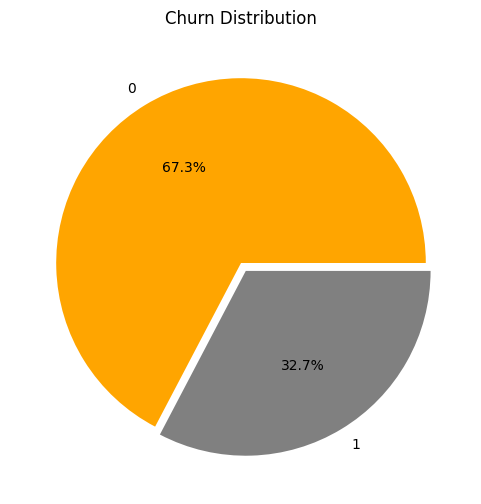

In [ ]:
#plotting a pie chart that shows the proportion of churn customers that we have
plt.figure(figsize = (6,6))
exp = [ 0,0.05]
plt.pie(Dormant_count, labels = Dormant_count.index, explode = exp, autopct= "%2.1f%%", colors = ['orange', 'grey'])
plt.title("Churn Distribution")
plt.show()

In [ ]:
#checking the total number of customers we have for each gender
Gender_count = df['SEX'].value_counts()
print(Gender_count)

SEX
M    1366
F     870
Name: count, dtype: int64


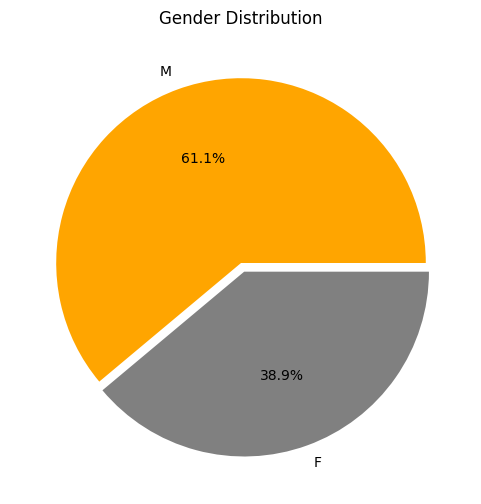

In [ ]:
#plotting pie chart to see the prportion of each gender in the datafrme
plt.figure(figsize=(6,6))
exp = [0,0.05]
plt.pie(Gender_count, labels=Gender_count.index, explode= exp, colors=['orange','grey'], autopct= '%2.1f%%')
plt.title('Gender Distribution')
plt.show()

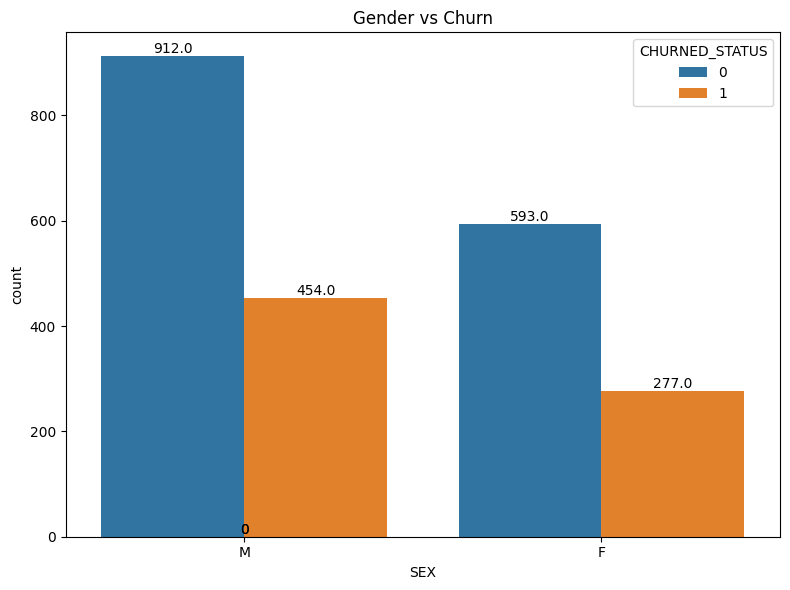

In [ ]:
#visualizing the number of accounts that has churned by gender
fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(x="SEX", hue="CHURNED_STATUS", data=df, ax=ax)
ax.set_title("Gender vs Churn")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

MODEL TESTING AND TRAINING

In [ ]:
df.head(10)

,ACCOUNTNUMBER,LAST_ACTIVITY_DATE,ACCOUNTCATEGORY,CUSTOMERTYPE,SEX,ONBOARDING_DATE,CURRENTBALANCE,TOTAL_TRANSACTION_AMOUNT,TOTAL_NO_OF_TRANSACTIONS,DEBIT_AMOUNT,...,GROWTH_RATE,AVG_TRANS_VALUE,DEBIT_TRANS_RATIO,TRANSACTION_FREQ,TOTAL_INACTIVITY_MONTH,TOTAL_TRANS_SLOPE_TREND,DEBIT_INACTIVTY_MONTHS,DEBIT_SLOPE_TREND,CREDIT_INACTIVITY_MONTHS,CREDIT_SLOPE_TREND
0,2085786289499440,2024-02-05,Current,INDIVIDUAL,M,2010-11-22,19898.00,20620.00,1.00,20620.00,...,0.00,10310.50,0.96,1.00,1.00,-17.07,1.00,-17.07,1.00,0.00
1,2085815657612740,2025-10-31,Current,INDIVIDUAL,M,2017-07-27,78270965.58,3032401434.00,1413.00,1469795447.00,...,-29.29,2144555.47,0.05,118.00,0.00,5393.66,0.00,26.05,0.00,0.00
2,2085817658511190,2025-10-28,Current,INDIVIDUAL,F,2020-12-24,13924988.33,908714904.00,539.00,459514752.00,...,-54.73,1682805.38,0.03,45.00,0.00,0.32,0.00,0.40,0.00,0.25
3,2096425570600840,2025-10-24,Current,INDIVIDUAL,M,2020-03-20,113585.33,180855000.00,202.00,91549932.00,...,3.68,890911.33,0.00,17.00,0.00,0.06,0.00,0.05,0.00,0.06
4,2096576728947265,2025-07-07,Current,INDIVIDUAL,M,2020-03-13,3291178.78,425004777.00,222.00,211674062.00,...,4.62,1905851.02,0.02,25.00,0.00,-0.16,0.00,-0.14,0.00,-0.17
5,2096750807861665,2025-10-20,Current,INDIVIDUAL,M,2025-01-16,2909396.57,249543797.00,103.00,124641158.00,...,4.52,2399459.60,0.02,15.00,5.00,0.96,6.00,0.87,5.00,0.98
6,2096778693940240,2025-10-31,Current,INDIVIDUAL,M,2019-03-20,74741895.89,4405296093.00,545.00,2202688828.00,...,157.98,8068307.86,0.03,61.00,3.00,-1.82,3.00,-1.78,3.00,-1.84
7,2097612505710715,2025-05-26,Current,INDIVIDUAL,M,2025-02-03,142233.67,15225323.00,19.00,7523753.00,...,0.00,761266.20,0.02,6.00,4.00,-0.00,4.00,-0.00,4.00,0.00
8,2097693626410840,2025-10-28,Current,INDIVIDUAL,M,2023-12-05,199916.55,76263548.00,64.00,38165993.00,...,-2.92,1173285.37,0.01,6.00,1.00,0.18,1.00,0.19,1.00,0.17
9,2097730682687740,2025-11-03,Current,INDIVIDUAL,M,2020-07-22,10401002.08,463503836.00,392.00,244894462.00,...,16.90,1179399.08,0.04,33.00,0.00,-2.31,0.00,-2.92,3.00,-1.67


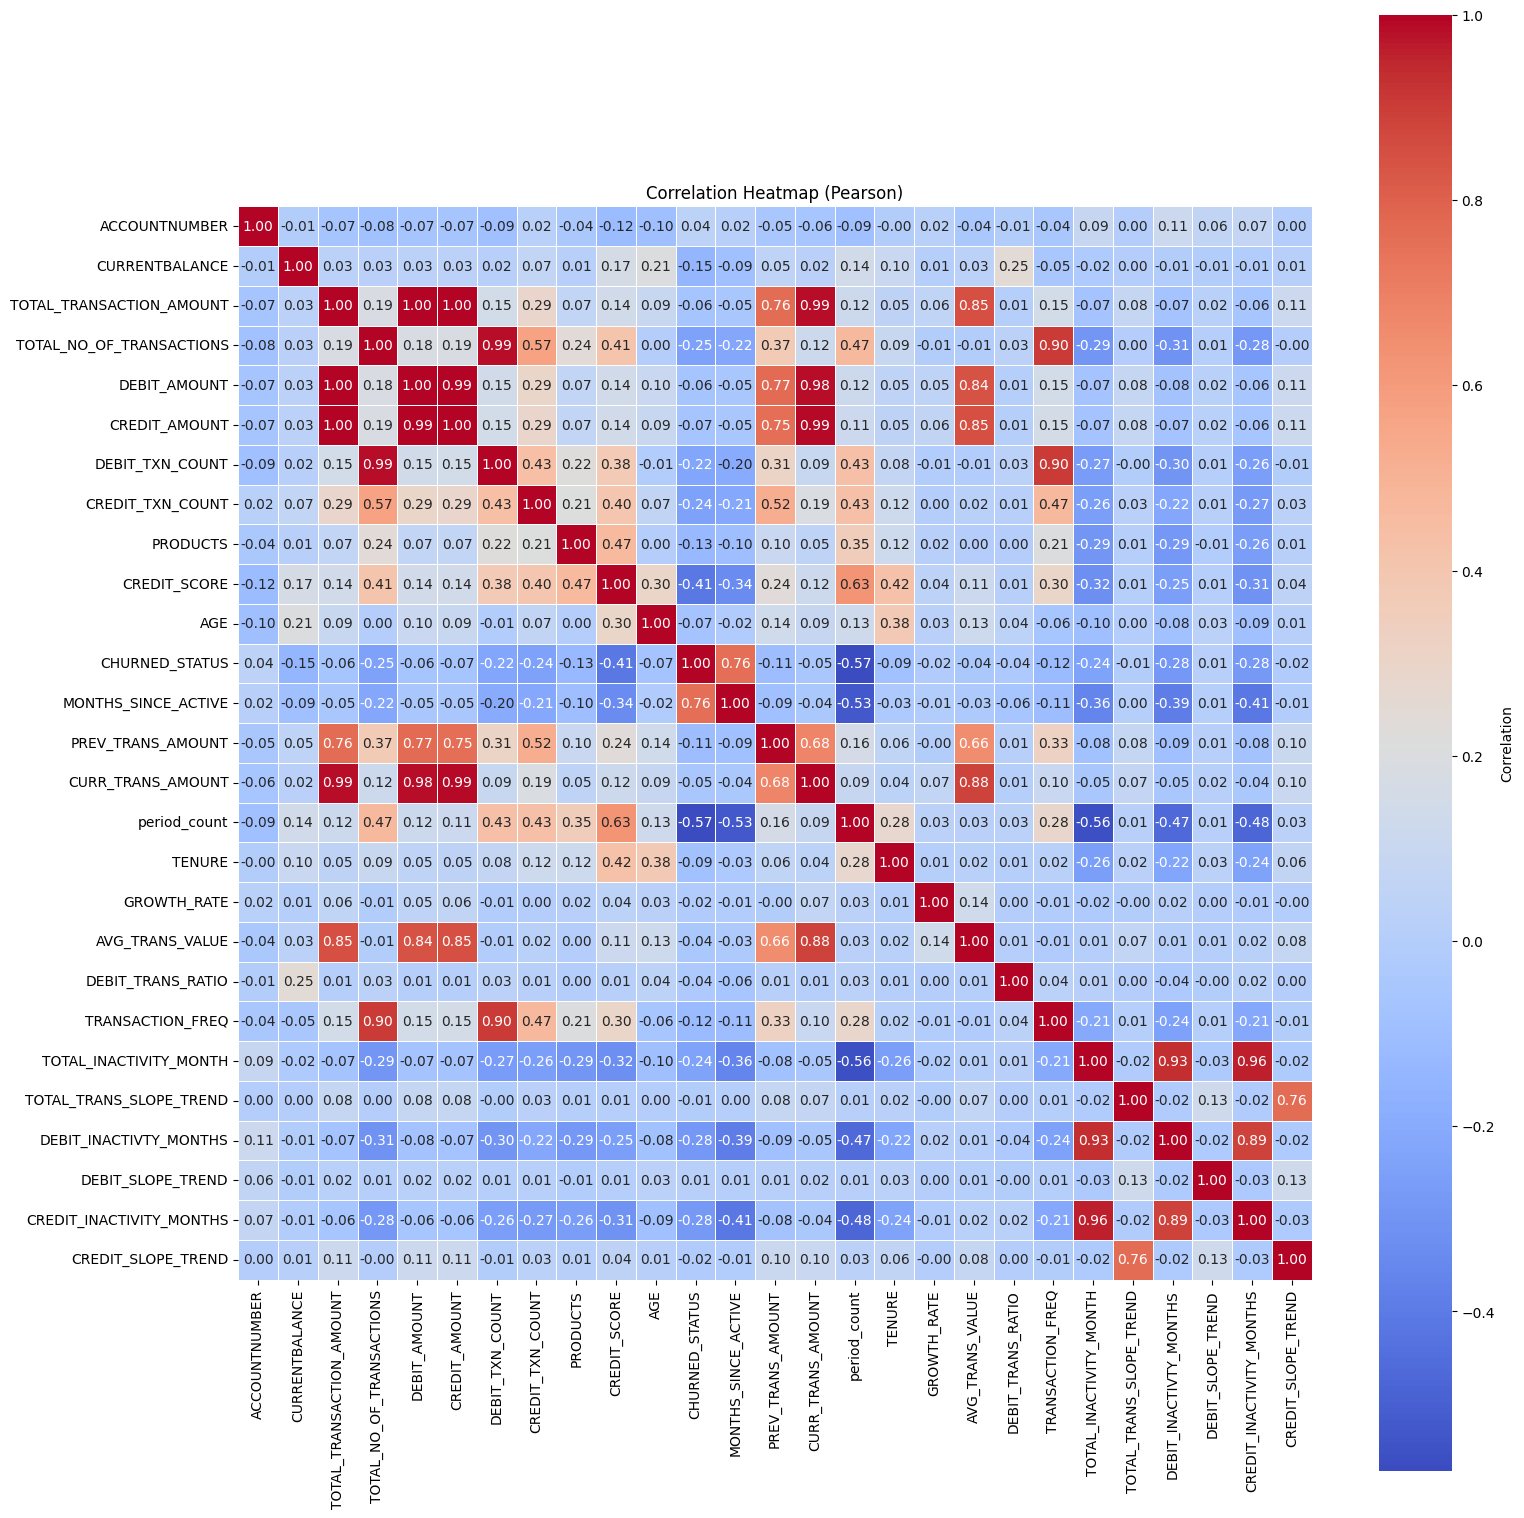

In [ ]:
#plotting correlation matrix
corr = df.corr(numeric_only=True, method='pearson')  


plt.figure(figsize=(16, 16))
sns.heatmap(
    corr,
    annot=True,           
    fmt=".2f",
    cmap="coolwarm",      
    square=True,
    linewidths=.5,
    cbar_kws={'label': 'Correlation'}
)
plt.title("Correlation Heatmap (Pearson)")
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['ACCOUNTNUMBER', 'LAST_ACTIVITY_DATE', 'ACCOUNTCATEGORY',
       'CUSTOMERTYPE', 'SEX', 'ONBOARDING_DATE', 'CURRENTBALANCE',
       'TOTAL_TRANSACTION_AMOUNT', 'TOTAL_NO_OF_TRANSACTIONS', 'DEBIT_AMOUNT',
       'CREDIT_AMOUNT', 'DEBIT_TXN_COUNT', 'CREDIT_TXN_COUNT', 'PRODUCTS',
       'CREDIT_SCORE', 'AGE', 'CHURNED_STATUS', 'MONTHS_SINCE_ACTIVE',
       'PREV_TRANS_AMOUNT', 'CURR_TRANS_AMOUNT', 'period_count', 'TENURE',
       'GROWTH_RATE', 'AVG_TRANS_VALUE', 'DEBIT_TRANS_RATIO',
       'TRANSACTION_FREQ', 'TOTAL_INACTIVITY_MONTH', 'TOTAL_TRANS_SLOPE_TREND',
       'DEBIT_INACTIVTY_MONTHS', 'DEBIT_SLOPE_TREND',
       'CREDIT_INACTIVITY_MONTHS', 'CREDIT_SLOPE_TREND'],
      dtype='object')

In [ ]:
#deleting columns that are not needed as they are highly correlated with other variables
cols_to_drop = ['ACCOUNTNUMBER', 'LAST_ACTIVITY_DATE', 'ACCOUNTCATEGORY',
       'CUSTOMERTYPE', 'ONBOARDING_DATE',
       'TOTAL_TRANSACTION_AMOUNT', 'TOTAL_NO_OF_TRANSACTIONS',
       'CREDIT_AMOUNT', 'DEBIT_TXN_COUNT', 'CREDIT_TXN_COUNT', 
       'MONTHS_SINCE_ACTIVE',
       'PREV_TRANS_AMOUNT', 'CURR_TRANS_AMOUNT', 'period_count', 
       'TOTAL_INACTIVITY_MONTH',
       'CREDIT_INACTIVITY_MONTHS','TOTAL_TRANS_SLOPE_TREND','DEBIT_AMOUNT','CREDIT_SLOPE_TREND' 
       ]
existing_cols = [col for col in cols_to_drop if col in df.columns]
df = df.drop(columns=existing_cols)

In [ ]:
df.tail(3)

,SEX,CURRENTBALANCE,PRODUCTS,CREDIT_SCORE,AGE,CHURNED_STATUS,TENURE,GROWTH_RATE,AVG_TRANS_VALUE,DEBIT_TRANS_RATIO,TRANSACTION_FREQ,DEBIT_INACTIVTY_MONTHS,DEBIT_SLOPE_TREND
2233,M,72068331.33,4.00,69.00,37,0,197.00,-64.60,3449075.31,0.23,13.00,0.00,0.13
2234,M,215448.20,4.00,80.00,43,0,30.00,34.55,355232.57,0.01,15.00,NaN,NaN
2235,M,8047541.33,3.00,87.00,39,0,120.00,-20.27,5452841.86,0.02,15.00,4.00,10.71


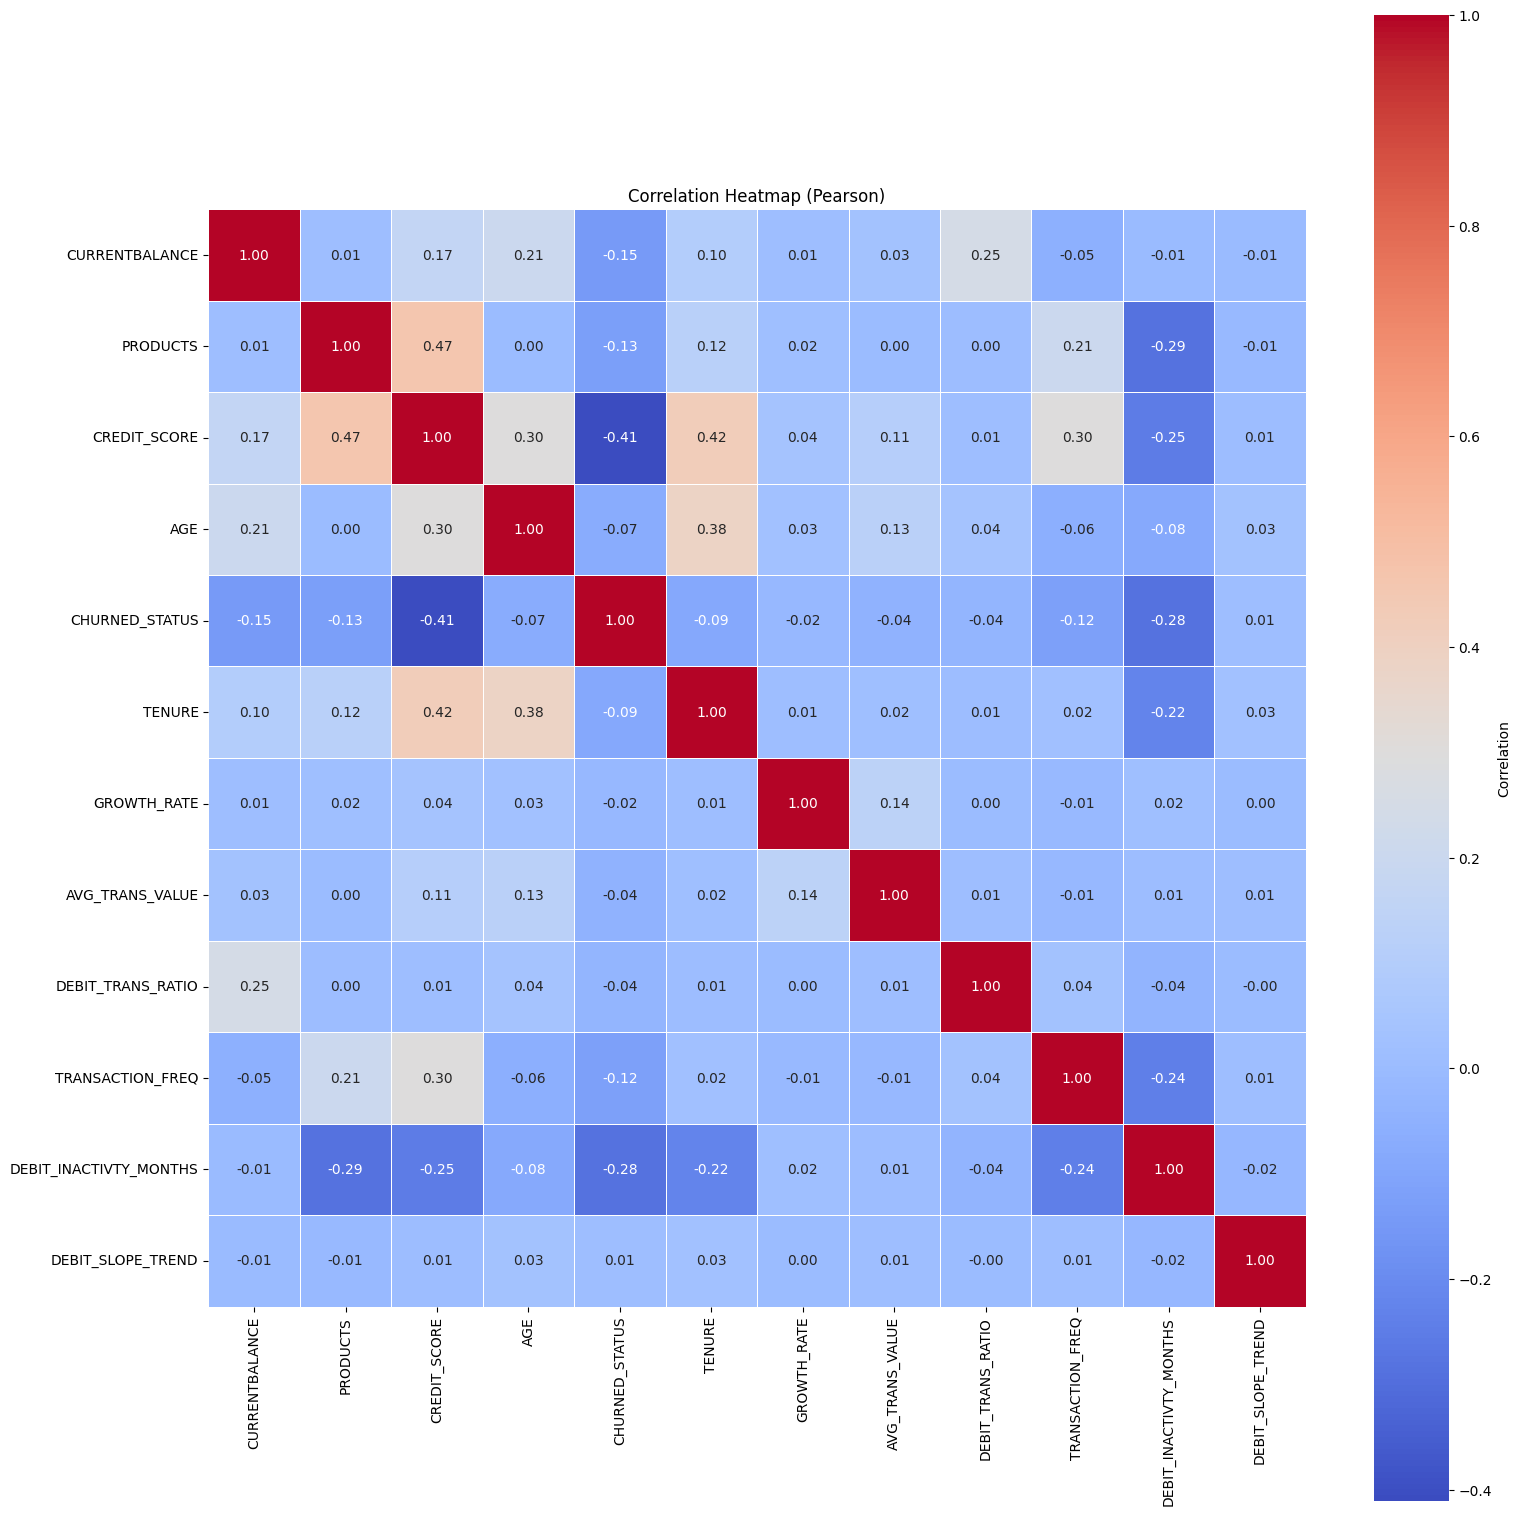

In [ ]:
#plotting correlation matrix
corr = df.corr(numeric_only=True, method='pearson')  


plt.figure(figsize=(16, 16))
sns.heatmap(
    corr,
    annot=True,           
    fmt=".2f",
    cmap="coolwarm",      
    square=True,
    linewidths=.5,
    cbar_kws={'label': 'Correlation'}
)
plt.title("Correlation Heatmap (Pearson)")
plt.tight_layout()
plt.show()

In [ ]:
df.head(10)

,SEX,CURRENTBALANCE,PRODUCTS,CREDIT_SCORE,AGE,CHURNED_STATUS,TENURE,GROWTH_RATE,AVG_TRANS_VALUE,DEBIT_TRANS_RATIO,TRANSACTION_FREQ,DEBIT_INACTIVTY_MONTHS,DEBIT_SLOPE_TREND
0,M,19898.00,1.00,23.00,61,1,182.00,0.00,10310.50,0.96,1.00,1.00,-17.07
1,M,78270965.58,3.00,60.00,62,0,102.00,-29.29,2144555.47,0.05,118.00,0.00,26.05
2,F,13924988.33,2.00,66.00,73,0,61.00,-54.73,1682805.38,0.03,45.00,0.00,0.40
3,M,113585.33,4.00,84.00,56,0,70.00,3.68,890911.33,0.00,17.00,0.00,0.05
4,M,3291178.78,2.00,57.00,63,1,70.00,4.62,1905851.02,0.02,25.00,0.00,-0.14
5,M,2909396.57,3.00,73.00,32,0,12.00,4.52,2399459.60,0.02,15.00,6.00,0.87
6,M,74741895.89,4.00,75.00,45,0,82.00,157.98,8068307.86,0.03,61.00,3.00,-1.78
7,M,142233.67,2.00,25.00,29,1,11.00,0.00,761266.20,0.02,6.00,4.00,-0.00
8,M,199916.55,3.00,35.00,46,0,25.00,-2.92,1173285.37,0.01,6.00,1.00,0.19
9,M,10401002.08,3.00,93.00,41,0,66.00,16.90,1179399.08,0.04,33.00,0.00,-2.92


In [ ]:
df.columns

Index(['SEX', 'CURRENTBALANCE', 'PRODUCTS', 'CREDIT_SCORE', 'AGE',
       'CHURNED_STATUS', 'TENURE', 'GROWTH_RATE', 'AVG_TRANS_VALUE',
       'DEBIT_TRANS_RATIO', 'TRANSACTION_FREQ', 'DEBIT_INACTIVTY_MONTHS',
       'DEBIT_SLOPE_TREND'],
      dtype='object')

In [ ]:
df.head(5)

,SEX,CURRENTBALANCE,PRODUCTS,CREDIT_SCORE,AGE,CHURNED_STATUS,TENURE,GROWTH_RATE,AVG_TRANS_VALUE,DEBIT_TRANS_RATIO,TRANSACTION_FREQ,DEBIT_INACTIVTY_MONTHS,DEBIT_SLOPE_TREND
0,M,19898.00,1.00,23.00,61,1,182.00,0.00,10310.50,0.96,1.00,1.00,-17.07
1,M,78270965.58,3.00,60.00,62,0,102.00,-29.29,2144555.47,0.05,118.00,0.00,26.05
2,F,13924988.33,2.00,66.00,73,0,61.00,-54.73,1682805.38,0.03,45.00,0.00,0.40
3,M,113585.33,4.00,84.00,56,0,70.00,3.68,890911.33,0.00,17.00,0.00,0.05
4,M,3291178.78,2.00,57.00,63,1,70.00,4.62,1905851.02,0.02,25.00,0.00,-0.14


In [ ]:
# selecing  y and x variables
label_col =  'CHURNED_STATUS'

X_cols = [ 'SEX','AGE', 'CURRENTBALANCE', 'PRODUCTS', 'CREDIT_SCORE', 
       'TENURE', 'GROWTH_RATE', 
       'AVG_TRANS_VALUE', 'DEBIT_TRANS_RATIO', 'TRANSACTION_FREQ',
       'DEBIT_INACTIVTY_MONTHS', 'DEBIT_SLOPE_TREND'
]


In [ ]:
#assigning x and y variables
X = df[X_cols].copy()
y = df[label_col].astype(int)


In [ ]:
#viewing the first 5 rows of the x variables
X.head()

,SEX,AGE,CURRENTBALANCE,PRODUCTS,CREDIT_SCORE,TENURE,GROWTH_RATE,AVG_TRANS_VALUE,DEBIT_TRANS_RATIO,TRANSACTION_FREQ,DEBIT_INACTIVTY_MONTHS,DEBIT_SLOPE_TREND
0,M,61,19898.00,1.00,23.00,182.00,0.00,10310.50,0.96,1.00,1.00,-17.07
1,M,62,78270965.58,3.00,60.00,102.00,-29.29,2144555.47,0.05,118.00,0.00,26.05
2,F,73,13924988.33,2.00,66.00,61.00,-54.73,1682805.38,0.03,45.00,0.00,0.40
3,M,56,113585.33,4.00,84.00,70.00,3.68,890911.33,0.00,17.00,0.00,0.05
4,M,63,3291178.78,2.00,57.00,70.00,4.62,1905851.02,0.02,25.00,0.00,-0.14


In [ ]:
X['SEX'] = X['SEX'].apply(lambda x: 1 if x == 'F' else 0) #converting the gender(SEX) into numerical values

In [ ]:
df.columns

Index(['SEX', 'CURRENTBALANCE', 'PRODUCTS', 'CREDIT_SCORE', 'AGE',
       'CHURNED_STATUS', 'TENURE', 'GROWTH_RATE', 'AVG_TRANS_VALUE',
       'DEBIT_TRANS_RATIO', 'TRANSACTION_FREQ', 'DEBIT_INACTIVTY_MONTHS',
       'DEBIT_SLOPE_TREND'],
      dtype='object')

In [ ]:
X.head(15)

,SEX,AGE,CURRENTBALANCE,PRODUCTS,CREDIT_SCORE,TENURE,GROWTH_RATE,AVG_TRANS_VALUE,DEBIT_TRANS_RATIO,TRANSACTION_FREQ,DEBIT_INACTIVTY_MONTHS,DEBIT_SLOPE_TREND
0,0,61,19898.00,1.00,23.00,182.00,0.00,10310.50,0.96,1.00,1.00,-17.07
1,0,62,78270965.58,3.00,60.00,102.00,-29.29,2144555.47,0.05,118.00,0.00,26.05
2,1,73,13924988.33,2.00,66.00,61.00,-54.73,1682805.38,0.03,45.00,0.00,0.40
3,0,56,113585.33,4.00,84.00,70.00,3.68,890911.33,0.00,17.00,0.00,0.05
4,0,63,3291178.78,2.00,57.00,70.00,4.62,1905851.02,0.02,25.00,0.00,-0.14
5,0,32,2909396.57,3.00,73.00,12.00,4.52,2399459.60,0.02,15.00,6.00,0.87
6,0,45,74741895.89,4.00,75.00,82.00,157.98,8068307.86,0.03,61.00,3.00,-1.78
7,0,29,142233.67,2.00,25.00,11.00,0.00,761266.20,0.02,6.00,4.00,-0.00
8,0,46,199916.55,3.00,35.00,25.00,-2.92,1173285.37,0.01,6.00,1.00,0.19
9,0,41,10401002.08,3.00,93.00,66.00,16.90,1179399.08,0.04,33.00,0.00,-2.92


In [ ]:
y.head(30)

0     1
1     0
2     0
3     0
4     1
5     0
6     0
7     1
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    1
21    1
22    0
23    0
24    1
25    0
26    0
27    1
28    1
29    0
Name: CHURNED_STATUS, dtype: int64

In [ ]:
X.tail(10)

,SEX,AGE,CURRENTBALANCE,PRODUCTS,CREDIT_SCORE,TENURE,GROWTH_RATE,AVG_TRANS_VALUE,DEBIT_TRANS_RATIO,TRANSACTION_FREQ,DEBIT_INACTIVTY_MONTHS,DEBIT_SLOPE_TREND
2226,1,41,263003.00,2.00,21.00,182.00,0.00,24107.00,2.18,2.00,0.00,0.01
2227,0,39,4304844.11,4.00,61.00,220.00,-0.07,18379.29,13.79,2.00,2.00,-0.52
2228,1,95,25709202.00,1.00,55.00,206.00,0.00,524918.50,12.38,3.00,8.00,6.66
2229,0,37,13404052.00,3.00,23.00,197.00,0.00,107388.39,4.30,32.00,0.00,-0.14
2230,1,45,15105584.50,2.00,65.00,162.00,-46.36,3942898.05,0.37,2.00,5.00,-1.20
2231,0,67,373484.75,2.00,31.00,220.00,-3.63,295682.32,0.03,6.00,0.00,-0.01
2232,0,43,27579299.67,1.00,63.00,214.00,0.00,12313625.89,0.24,3.00,7.00,-31.17
2233,0,37,72068331.33,4.00,69.00,197.00,-64.60,3449075.31,0.23,13.00,0.00,0.13
2234,0,43,215448.20,4.00,80.00,30.00,34.55,355232.57,0.01,15.00,NaN,NaN
2235,0,39,8047541.33,3.00,87.00,120.00,-20.27,5452841.86,0.02,15.00,4.00,10.71


In [ ]:
#importing function to split the dataset into 2 train for training the model and test for testing the model on an unseen data
import sklearn.model_selection 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler #standardizing the dataset

In [ ]:
scaler = StandardScaler() #creating a scaler object that will standardize features 

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #fitting the data, this will equates the mean to 0 and standard deviation to 1
X_test_scaled  = scaler.transform(X_test)


In [ ]:
import joblib 
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [ ]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions): #defining a function to show the performance of the model
    print("Accuracy Score on Model is {}".format(accuracy_score(y_test, predictions)))

In [ ]:
from sklearn.model_selection import GridSearchCV 

Logisitics Regression

In [ ]:
from sklearn.linear_model import LogisticRegression #importing logistics regression model

In [ ]:
log_model = LogisticRegression(class_weight='balanced'
) #defining a name for the model

In [ ]:
import warnings #telling python to ignore all warning
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

log_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),  
    ("model", LogisticRegression(max_iter=1000))
])


log_pipe.fit(X_train, y_train)


y_pred = log_pipe.predict(X_test)

In [ ]:
X.head(5)

,SEX,AGE,CURRENTBALANCE,PRODUCTS,CREDIT_SCORE,TENURE,GROWTH_RATE,AVG_TRANS_VALUE,DEBIT_TRANS_RATIO,TRANSACTION_FREQ,DEBIT_INACTIVTY_MONTHS,DEBIT_SLOPE_TREND
0,0,61,19898.00,1.00,23.00,182.00,0.00,10310.50,0.96,1.00,1.00,-17.07
1,0,62,78270965.58,3.00,60.00,102.00,-29.29,2144555.47,0.05,118.00,0.00,26.05
2,1,73,13924988.33,2.00,66.00,61.00,-54.73,1682805.38,0.03,45.00,0.00,0.40
3,0,56,113585.33,4.00,84.00,70.00,3.68,890911.33,0.00,17.00,0.00,0.05
4,0,63,3291178.78,2.00,57.00,70.00,4.62,1905851.02,0.02,25.00,0.00,-0.14


In [ ]:
X.isnull().sum()

SEX                       0
AGE                       0
CURRENTBALANCE            0
PRODUCTS                  0
CREDIT_SCORE              0
TENURE                    0
GROWTH_RATE               0
AVG_TRANS_VALUE           0
DEBIT_TRANS_RATIO         0
TRANSACTION_FREQ          0
DEBIT_INACTIVTY_MONTHS    1
DEBIT_SLOPE_TREND         1
dtype: int64

In [ ]:
df.head()

,SEX,CURRENTBALANCE,PRODUCTS,CREDIT_SCORE,AGE,CHURNED_STATUS,TENURE,GROWTH_RATE,AVG_TRANS_VALUE,DEBIT_TRANS_RATIO,TRANSACTION_FREQ,DEBIT_INACTIVTY_MONTHS,DEBIT_SLOPE_TREND
0,M,19898.00,1.00,23.00,61,1,182.00,0.00,10310.50,0.96,1.00,1.00,-17.07
1,M,78270965.58,3.00,60.00,62,0,102.00,-29.29,2144555.47,0.05,118.00,0.00,26.05
2,F,13924988.33,2.00,66.00,73,0,61.00,-54.73,1682805.38,0.03,45.00,0.00,0.40
3,M,113585.33,4.00,84.00,56,0,70.00,3.68,890911.33,0.00,17.00,0.00,0.05
4,M,3291178.78,2.00,57.00,63,1,70.00,4.62,1905851.02,0.02,25.00,0.00,-0.14


In [ ]:
'''y_pred = log_model.predict(X_test) #make predictions based on the X variable
print(y_pred)'''

'y_pred = log_model.predict(X_test) #make predictions based on the X variable\nprint(y_pred)'

In [ ]:
modelperformance(y_pred) #checking the model performance

Accuracy Score on Model is 0.34151785714285715


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
#plotting confusion matrix
print(conf_matrix)
print(class_report)
print(accuracy)

[[ 74 242]
 [ 53  79]]
              precision    recall  f1-score   support

           0       0.58      0.23      0.33       316
           1       0.25      0.60      0.35       132

    accuracy                           0.34       448
   macro avg       0.41      0.42      0.34       448
weighted avg       0.48      0.34      0.34       448

0.34151785714285715


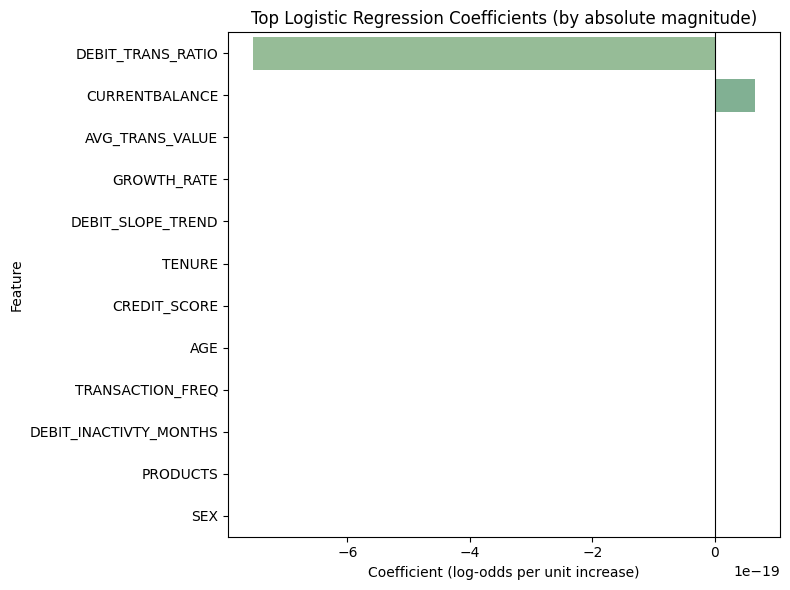

,feature,coef,abs_coef
8,DEBIT_TRANS_RATIO,-0.00,0.00
2,CURRENTBALANCE,0.00,0.00
7,AVG_TRANS_VALUE,-0.00,0.00
6,GROWTH_RATE,-0.00,0.00
11,DEBIT_SLOPE_TREND,0.00,0.00
5,TENURE,-0.00,0.00
4,CREDIT_SCORE,-0.00,0.00
1,AGE,-0.00,0.00
9,TRANSACTION_FREQ,-0.00,0.00
10,DEBIT_INACTIVTY_MONTHS,-0.00,0.00


In [ ]:
#plotting feature of importance

clf = log_pipe.named_steps["model"]


coef = clf.coef_.ravel()   


preprocess = log_pipe.named_steps.get("preprocess", None)
if preprocess is not None and hasattr(preprocess, "get_feature_names_out"):
    feat_names = preprocess.get_feature_names_out()
else:
  
    feat_names = getattr(X_train, "columns", np.array([f"f{i}" for i in range(len(coef))]))

coef_df = pd.DataFrame({
    "feature": feat_names,
    "coef": coef,
    "abs_coef": np.abs(coef)
}).sort_values("abs_coef", ascending=False)


top_k = 20
top_df = coef_df.head(top_k)

plt.figure(figsize=(8, max(6, 0.35 * len(top_df))))
sns.barplot(data=top_df, y="feature", x="coef", palette="crest")
plt.title("Top Logistic Regression Coefficients (by absolute magnitude)")
plt.xlabel("Coefficient (log-odds per unit increase)")
plt.ylabel("Feature")
plt.axvline(0, color="black", linewidth=0.8)
plt.tight_layout()
plt.show()


display(coef_df)

In [ ]:
X.head()

,SEX,AGE,CURRENTBALANCE,PRODUCTS,CREDIT_SCORE,TENURE,GROWTH_RATE,AVG_TRANS_VALUE,DEBIT_TRANS_RATIO,TRANSACTION_FREQ,DEBIT_INACTIVTY_MONTHS,DEBIT_SLOPE_TREND
0,0,61,19898.00,1.00,23.00,182.00,0.00,10310.50,0.96,1.00,1.00,-17.07
1,0,62,78270965.58,3.00,60.00,102.00,-29.29,2144555.47,0.05,118.00,0.00,26.05
2,1,73,13924988.33,2.00,66.00,61.00,-54.73,1682805.38,0.03,45.00,0.00,0.40
3,0,56,113585.33,4.00,84.00,70.00,3.68,890911.33,0.00,17.00,0.00,0.05
4,0,63,3291178.78,2.00,57.00,70.00,4.62,1905851.02,0.02,25.00,0.00,-0.14


In [ ]:
#making a prediction

log_pipe.predict([[0,61,19898.00,1.00,23.00,182.00,0.00,10310.50,0.96,1.00,1.00,-17.07

]])

array([1])

In [ ]:
'''sns.set(style="whitegrid")


coef = log_model.coef_.ravel()   # shape: (n_features,)
feat_names = np.array(getattr(X, 'columns', [f'f{i}' for i in range(len(coef))]))

# Sort by absolute weight
order = np.argsort(np.abs(coef))[::-1]
coef_sorted = coef[order]
feat_sorted = feat_names[order]

plt.figure(figsize=(8, max(4, len(coef_sorted)*0.35)))
palette = ["#e48538" if w < 0 else "#9a9c9a" for w in coef_sorted]
sns.barplot(x=coef_sorted, y=feat_sorted, palette=palette)
plt.axvline(0, color='k', lw=1)
plt.title("Logistic Regression Feature Weights")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
'''

'sns.set(style="whitegrid")\n\n\ncoef = log_model.coef_.ravel()   # shape: (n_features,)\nfeat_names = np.array(getattr(X, \'columns\', [f\'f{i}\' for i in range(len(coef))]))\n\n# Sort by absolute weight\norder = np.argsort(np.abs(coef))[::-1]\ncoef_sorted = coef[order]\nfeat_sorted = feat_names[order]\n\nplt.figure(figsize=(8, max(4, len(coef_sorted)*0.35)))\npalette = ["#e48538" if w < 0 else "#9a9c9a" for w in coef_sorted]\nsns.barplot(x=coef_sorted, y=feat_sorted, palette=palette)\nplt.axvline(0, color=\'k\', lw=1)\nplt.title("Logistic Regression Feature Weights")\nplt.xlabel("Coefficient")\nplt.ylabel("Feature")\nplt.tight_layout()\nplt.show()\n'

DECISION TREEE

In [ ]:
from sklearn.tree import DecisionTreeClassifier #importing decission tree model

In [ ]:
#scaling the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#definig the model
tree_model = DecisionTreeClassifier(max_depth=5, random_state=0)
tree_model.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current nod

In [ ]:
y_pred = tree_model.predict(X_test)

In [ ]:
modelperformance(y_pred) #checking the model performance

Accuracy Score on Model is 0.9084821428571429


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
#ploting confusion matrix
print(conf_matrix)
print(class_report)
print(accuracy)

[[290  26]
 [ 15 117]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       316
           1       0.82      0.89      0.85       132

    accuracy                           0.91       448
   macro avg       0.88      0.90      0.89       448
weighted avg       0.91      0.91      0.91       448

0.9084821428571429


In [ ]:
#making a prediction
tree_model.predict([[0,61,19898.00,1.00,23.00,182.00,0.00,10310.50,0.96,1.00,1.00,-17.07
]])

array([0])

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42) 
model.fit(X_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
modelperformance(y_pred) #checking the model performance

Accuracy Score on Model is 0.9263392857142857


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(conf_matrix)
print(class_report)
print(accuracy)

[[301  15]
 [ 18 114]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       316
           1       0.88      0.86      0.87       132

    accuracy                           0.93       448
   macro avg       0.91      0.91      0.91       448
weighted avg       0.93      0.93      0.93       448

0.9263392857142857


In [ ]:

joblib.dump(scaler, "scaler.pkl")        
joblib.dump(model,  "Churn.joblib")

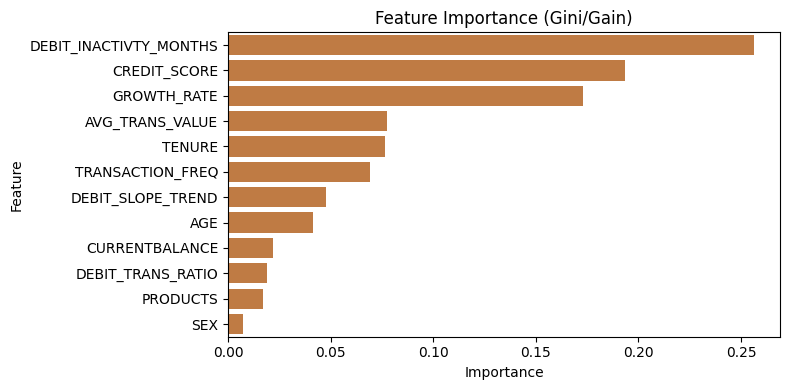

In [ ]:
#plotting to know the feature importance, the x variable the model uses the most to make predictions

importances = model.feature_importances_        
feat_names = np.array(X.columns)

idx = np.argsort(importances)[::-1]
feat_sorted = feat_names[idx]
imp_sorted  = importances[idx]

plt.figure(figsize=(8, max(4, len(feat_sorted)*0.3)))
sns.barplot(x=imp_sorted, y=feat_sorted, color="#d37930")
plt.title("Feature Importance (Gini/Gain)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
X.head()

,SEX,AGE,CURRENTBALANCE,PRODUCTS,CREDIT_SCORE,TENURE,GROWTH_RATE,AVG_TRANS_VALUE,DEBIT_TRANS_RATIO,TRANSACTION_FREQ,DEBIT_INACTIVTY_MONTHS,DEBIT_SLOPE_TREND
0,0,61,19898.00,1.00,23.00,182.00,0.00,10310.50,0.96,1.00,1.00,-17.07
1,0,62,78270965.58,3.00,60.00,102.00,-29.29,2144555.47,0.05,118.00,0.00,26.05
2,1,73,13924988.33,2.00,66.00,61.00,-54.73,1682805.38,0.03,45.00,0.00,0.40
3,0,56,113585.33,4.00,84.00,70.00,3.68,890911.33,0.00,17.00,0.00,0.05
4,0,63,3291178.78,2.00,57.00,70.00,4.62,1905851.02,0.02,25.00,0.00,-0.14


In [ ]:
#making a prediction
model.predict([[0,61,19898.00,1.00,23.00,182.00,0.00,10310.50,0.96,1.00,1.00,-17.07
]])

array([0])